## BHT+VTS+IB experiment
Main experiment analyses

In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import random
import glob
import dill 

# Settings
# plt.style.use('seaborn-dark') 
plt.style.use('seaborn-v0_8-whitegrid') 
plt.style.use('seaborn-v0_8-deep') # https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.rcParams['figure.dpi'] = 120

pd.set_option('display.float_format', lambda x: f'{x:.5f}'.rstrip('0').rstrip('.')) # disable scientific notation & set decimal point & strip 0's


# Data preparation

## Load data

Environment variables

In [74]:
# save 
filename = 'globalsave.pkl'
dill.dump_session(filename)


In [3]:
# load
filename = 'globalsave_12_02_24.pkl'
dill.load_session(filename)

Data

In [4]:
# Folder path where CSV files are located
folder_path = 'C:/Users/Bartek/Badania/PdB Exp2 IB/Data analysis/Main1/Data_16_02_24'

## VTS
csv_files = glob.glob(folder_path + '/*_vts.csv')
dfs = []
for file in csv_files:
    df = pd.read_csv(file, delimiter=';', encoding = "ISO-8859-1")
    dfs.append(df)
d1 = pd.concat(dfs, ignore_index=True)

## Explicit data
csv_files = glob.glob(folder_path + '/*_explicit.csv')
dfs = []
for file in csv_files:
    df = pd.read_csv(file, delimiter=';')
    dfs.append(df)
e1 = pd.concat(dfs, ignore_index=True)

## BHT problems
csv_files = glob.glob(folder_path + '/*_problem.csv')
dfs = []
for file in csv_files:
    df = pd.read_csv(file, delimiter=';')
    dfs.append(df)
bp1 = pd.concat(dfs, ignore_index=True)

## BHT main
csv_files = glob.glob(folder_path + '/*_bht.csv')
dfs = []
for file in csv_files:  
    df = pd.read_csv(file, delimiter=';', encoding = 'cp1252')
    dfs.append(df)
b1 = pd.concat(dfs, ignore_index=True)
b2 = b1.copy()
b2.rename(columns={'participant':'id', 'task_sel':'task'}, inplace=True)
b2.drop(columns=['date','exp_name'], inplace=True)
b2[['frame_rate','rt','fb_delay','ib_rt']] = b2[['frame_rate','rt','fb_delay','ib_rt']].round(2)
b2

## Durations
csv_files = glob.glob(folder_path + '/*_durations.csv')
dfs = []
for file in csv_files:
    df = pd.read_csv(file, delimiter=';')
    dfs.append(df)
dur1 = pd.concat(dfs, ignore_index=True)
dur1.drop(columns=['exp_date'], inplace=True)

## Wrangle 

In [5]:
d2 = d1.copy()
d2.rename(columns={'participant':'id', 'task_sel':'task'}, inplace=True)
d2.drop(columns=['date','exp_name'], inplace=True)
d2[['frame_rate','rt','fb_delay','ib_rt']] = d2[['frame_rate','rt','fb_delay','ib_rt']].round(2)
d2

,id,sex,age,condition,cb,frame_rate,training_vts,enable_ib,trial_time,trial_nr,...,response,correct_resp,correct,task,rt,fb_delay,fb_delay_index,ib_estimation,ib_rt,ib_start
0,201,Kobieta,21,1,1,59.98,1,0,2024-01-09_10h15.41.353,0,...,k,o,0,2,1.8,0.9,0,-1,-1,-1
1,201,Kobieta,21,1,1,59.98,1,0,2024-01-09_10h15.45.885,1,...,ralt,ralt,1,2,1.83,0.6,1,-1,-1,-1
2,201,Kobieta,21,1,1,59.98,1,0,2024-01-09_10h15.50.142,2,...,lalt,NaN,-1,-1,1.46,0.9,2,-1,-1,-1
3,201,Kobieta,21,1,1,59.98,1,0,2024-01-09_10h15.56.423,3,...,ralt,ralt,1,2,2.01,0.6,3,-1,-1,-1
4,201,Kobieta,21,1,1,59.98,1,0,2024-01-09_10h16.00.860,4,...,k,k,1,2,2.31,0.9,4,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27355,320,Kobieta,19,0,1,60.01,0,1,2024-02-09_12h51.43.055,67,...,lalt,lalt,1,1,2.05,0.9,67,3,2.84,4
27356,320,Kobieta,19,0,1,60.01,0,1,2024-02-09_12h51.50.695,68,...,o,o,1,2,1.76,0.6,68,3,1.9,2
27357,320,Kobieta,19,0,1,60.01,0,1,2024-02-09_12h51.56.781,69,...,ralt,ralt,1,2,1.98,0.3,69,1,1.3,3
27358,320,Kobieta,19,0,1,60.01,0,1,2024-02-09_12h52.02.186,70,...,o,o,1,2,1.74,0.3,70,2,2.67,6


In [16]:
d2.value_counts(['task', 'action'])
d2.value_counts('action', normalize=True)

d2.groupby('id')['action'].value_counts(normalize=True)

id   action
201  1         0.9375
     8         0.0625
202  1         0.9625
     8        0.02917
     9        0.00833
                ...  
316  8        0.01667
     9        0.00417
318  1        0.93333
     8         0.0625
     9        0.00417
Name: proportion, Length: 316, dtype: float64

Pre-mature and late responses per ID

In [6]:
dg2 = d2.groupby('id')['action'].value_counts(normalize=True)
dg2 = pd.DataFrame(dg2)
dg2.rename(columns={'action':'prop'}, inplace=True)
dg2.reset_index(inplace=True)

dg2 = dg2[dg2['action'].isin([8,9])]

dg2

,id,action,proportion
1,201,8,0.0625
3,202,8,0.02917
4,202,9,0.00833
6,203,8,0.06667
7,203,9,0.02917
...,...,...,...
317,318,8,0.0625
318,318,9,0.00417
320,319,8,0.025
321,319,9,0.00417


Plot

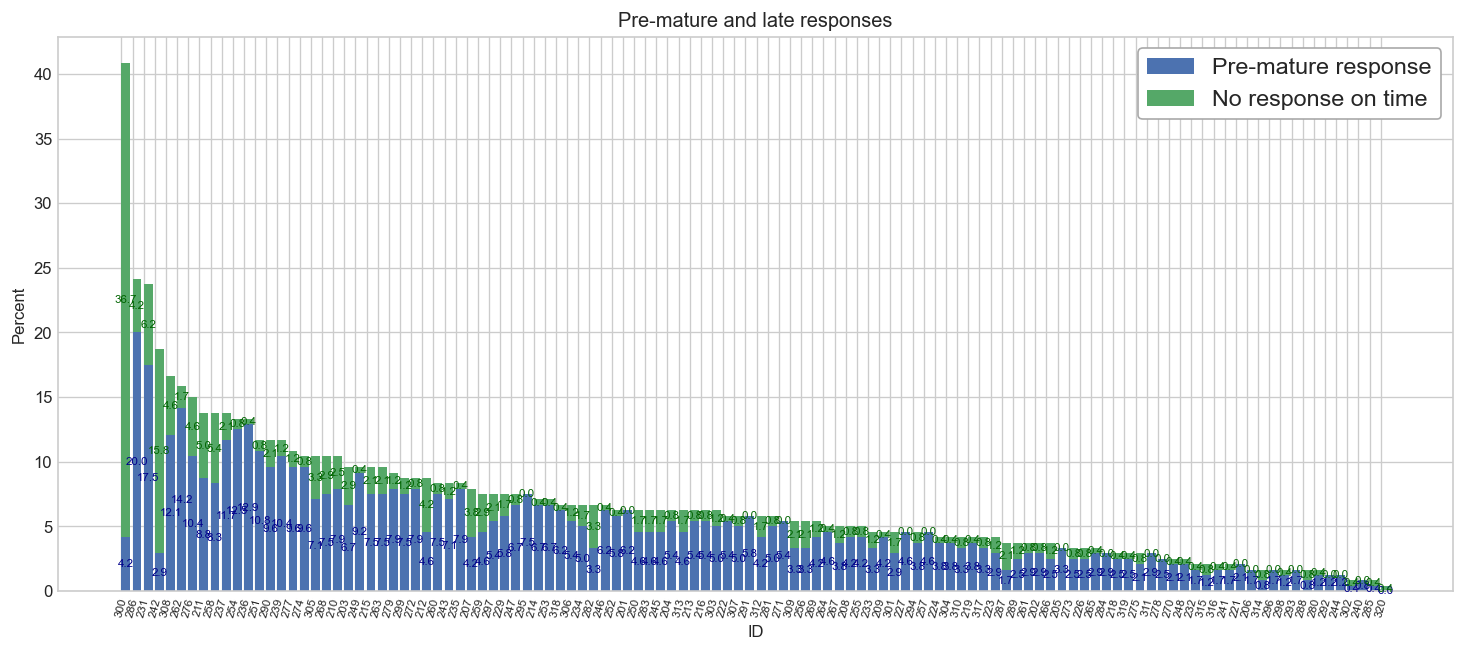

In [7]:
# Grouping data by 'ID' and 'action' and aggregating 'prop' values
grouped = dg2.groupby(['id', 'action'])['proportion'].sum().unstack(fill_value=0)
grouped *= 100 # Transforming prop values to percentages

# Sort the index based on the sum of 'prop' values in descending order
sorted_index = grouped.sum(axis=1).sort_values(ascending=False).index
categories = grouped.loc[sorted_index].index

# Rest of your code remains unchanged
fig, ax = plt.subplots(figsize=(15, 6))
width = 0.8  # Increase the width to add space between bars
padding = 0.1  # Adjust the padding between the bars

x = range(len(categories))

bars1 = ax.bar(x, grouped.loc[sorted_index][8], width, align='edge', label='Pre-mature response')
bars2 = ax.bar(x, grouped.loc[sorted_index][9], width, bottom=grouped.loc[sorted_index][8], align='edge', label='No response on time')

ax.set_xlabel('ID')
ax.set_ylabel('Percent')
ax.set_title('Pre-mature and late responses')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=75, fontsize=7)
ax.legend(prop={'size': 14}, edgecolor='darkgrey', framealpha=1, frameon=True)


# Add text labels for 'prop' values
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    total_height = height1 + height2
    ax.text(bar1.get_x() + bar1.get_width() / 2, height1 / 2, f'{height1:.1f}', ha='center', va='center', color='darkblue', size=7)
    ax.text(bar2.get_x() + bar2.get_width() / 2, height1 + height2 / 2, f'{height2:.1f}', ha='center', va='center', color='darkgreen', size=7)

plt.show()


Filter out wrong responses and training


In [ ]:
# d3 = d2[~d2['action'].isin([-1, 8, 9])] # Filter out premature/late responses 
# d3.value_counts('task', normalize=True)
# d3

,id,condition,cb,frame_rate,training_vts,enable_ib,trial_nr,block_nr,stim,action,...,response,correct_resp,correct,task,rt,fb_delay,fb_delay_index,ib_estimation,ib_rt,ib_start
27,1008,0,1,59.99,0,1,3,1,circle_right,1,...,lalt,lalt,1,1,1.88,0.6,3,5,0.23,5
28,1008,0,1,59.99,0,1,4,1,square_right,1,...,lalt,lalt,1,1,2.13,0.6,4,8,0.59,7
29,1008,0,1,59.99,0,1,5,1,triangle_middle,1,...,d,d,1,1,1.72,0.3,5,3,0.46,2
30,1008,0,1,59.99,0,1,6,1,square_left,1,...,w,w,1,1,1.71,0.9,6,6,0.37,5
38,1008,0,1,59.99,0,1,14,1,triangle_right,1,...,lalt,lalt,1,1,1.72,0.3,14,6,0.98,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,1026,0,2,60.02,0,1,67,3,square_middle,1,...,k,k,1,1,1.79,0.6,67,2,0.53,2
4316,1026,0,2,60.02,0,1,68,3,triangle_right,1,...,o,o,1,1,1.65,0.3,68,3,0.59,3
4317,1026,0,2,60.02,0,1,69,3,circle_left,1,...,ralt,ralt,1,1,1.68,0.3,69,5,2.62,6
4318,1026,0,2,60.02,0,1,70,3,square_right,1,...,d,d,1,2,3.15,0.6,70,5,1.32,7


Calculate switch and fill NaNs for correct and RTs

In [30]:
d3 = d2.copy()
d3 = d3[~d3['training_vts'].isin([1])] # Filter out training session

excl_acts = [0, 8, 9]                                       # action codes to exclude from switch calculations
d3['switch'] = np.where(                                    # conditions
    ((d3['action'].eq(1) | d3['action'].shift().isin(excl_acts)) &
    (d3['action'].shift().eq(1) | d3['action'].isin(excl_acts))) &
    ~((d3['action'].isin(excl_acts)) & (d3['action'].shift().isin(excl_acts))),
    (d3['task'].ne(d3['task'].shift())).astype(int),        # if conditions above are true, execute this (calculate switch 0/1)
    np.nan                                                  # if conditions above are not true, execute this (fill NaNs)
)


# Fill NaNs for correct and RTs
d3['correct'] = d3['correct'].replace([-1, 9], np.nan)
d3['rt'] = d3['rt'].replace([-1], np.nan)
d3['task'] = d3['task'].replace([-1], np.nan)


d3

,id,sex,age,condition,cb,frame_rate,training_vts,enable_ib,trial_time,trial_nr,...,correct_resp,correct,task,rt,fb_delay,fb_delay_index,ib_estimation,ib_rt,ib_start,switch
24,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h35.58.262,0,...,o,0,2,1.76,0.9,0,7,5.29,6,NaN
25,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.08.011,1,...,ralt,1,2,1.9,0.6,1,3,2.27,3,0
26,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.14.596,2,...,k,1,2,2,0.9,2,1,3.81,2,0
27,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.23.138,3,...,ralt,1,2,2.19,0.6,3,5,2.94,8,0
28,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.30.678,4,...,w,1,1,1.92,0.9,4,4,1.96,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27355,320,Kobieta,19,0,1,60.01,0,1,2024-02-09_12h51.43.055,67,...,lalt,1,1,2.05,0.9,67,3,2.84,4,0
27356,320,Kobieta,19,0,1,60.01,0,1,2024-02-09_12h51.50.695,68,...,o,1,2,1.76,0.6,68,3,1.9,2,1
27357,320,Kobieta,19,0,1,60.01,0,1,2024-02-09_12h51.56.781,69,...,ralt,1,2,1.98,0.3,69,1,1.3,3,0
27358,320,Kobieta,19,0,1,60.01,0,1,2024-02-09_12h52.02.186,70,...,o,1,2,1.74,0.3,70,2,2.67,6,0


## Descriptives, demographics

Sample, demographics

In [12]:
# N
d3['id'].nunique() # len(d3['id'].unique()) 

114

In [13]:
# N per group
d3.groupby(['id','condition']).size().groupby('condition').size()

condition
0    55
1    59
dtype: int64

In [14]:
d3['condition'].value_counts(normalize=True)
d3['condition'].value_counts()
# len(d3['id'].unique())

condition
1    12312
0    11664
Name: count, dtype: int64

## Cleaning 

1. Control item reversed answers 
2. Accuracy <65%
3. Duration at & between the tasks
4. No switches
5. *Short run 

Control item reversed answers 

In [14]:
e1.rename(columns={'participant':'id'}, inplace=True)
e2 = e1[['id', 'condition', 'ratings', 'agef1_rating']]
e2 = e2[e2['ratings'] == 'bht']
e2

e2[((e2['condition'] == 1) & (e2['agef1_rating'] == 0)) | ((e2['condition'] == 0) & (e2['agef1_rating'] == 6))]
# no such ids!

,id,condition,ratings,agef1_rating


Accuracy below 65%


In [15]:
# Calculate accuracy per participant
d5b = d3[~d3['training_vts'].isin([1])] # remove training

d3a = d5b.groupby(['id', 'condition']).agg({'correct': 'mean'}).reset_index()
d3a.rename(columns={'correct': 'accuracy'}, inplace=True)
d3a

d3b = d3a[d3a['accuracy'] < 0.65]
d3b

,id,condition,accuracy
25,231,1,0.3253
39,246,0,0.45933
93,300,0,0.35938


In [16]:
# Get IDs of outliers
out_acc = d3b['id'].unique()
out_acc

array([231, 246, 300], dtype=int64)

Durations

In [17]:
dur1

# dur1.iloc[:,1:].agg(['mean', 'std'])

# Calculating mean, standard deviation, low_threshold, and hi_threshold for each variable
durav = pd.DataFrame({
    'var': dur1.columns[1:],
    'mean': dur1.mean().values[1:],
    'sd': dur1.std().values[1:],
    'low_threshold': (dur1.mean() - 3 * dur1.std()).values[1:],
    'hi_threshold': (dur1.mean() + 3 * dur1.std()).values[1:]
})

durav

,var,mean,sd,low_threshold,hi_threshold
0,training,809.39639,203.81422,197.95373,1420.83905
1,explicit1,60.9722,29.49712,-27.51916,149.46356
2,bht,614.74878,93.00063,335.7469,893.75067
3,vts,1413.58644,170.89676,900.89617,1926.27671
4,between,156.25188,48.8647,9.65777,302.84599
5,explicit2,43.15755,17.49796,-9.33634,95.65144
6,total,3037.1412,389.16543,1869.64491,4204.6375


In [18]:
dur2 = dur1.copy()

# Create new logical columns in dur1 based on durav thresholds
for index, row in durav.iterrows():
    variable = row['var']
    # low_threshold_col = f'{variable}_low_threshold'
    # high_threshold_col = f'{variable}_hi_threshold'
    # dur2[f'{variable}_above_hi_threshold'] = dur2[variable] > row['hi_threshold']
    # dur2[f'{variable}_below_lo_threshold'] = dur2[variable] < row['low_threshold']
    threshold_col = f'{variable}_outl'
    dur2[threshold_col] = (dur2[variable] < row['low_threshold']) | (dur2[variable] > row['hi_threshold'])


dur2

,participant,training,explicit1,bht,vts,between,explicit2,total,training_outl,explicit1_outl,bht_outl,vts_outl,between_outl,explicit2_outl,total_outl
0,201,1077.05406,78.55248,643.86371,1474.40887,181.63932,45.33184,3422.29794,False,False,False,False,False,False,False
1,202,889.64732,61.55252,615.20611,1222.04748,159.40139,54.9564,2941.25897,False,False,False,False,False,False,False
2,203,1103.84662,78.56209,607.16083,1273.24602,199.6878,56.65303,3240.59452,False,False,False,False,False,False,False
3,204,907.31125,91.91415,628.26681,1731.4868,238.5966,60.69845,3566.36003,False,False,False,False,False,False,False
4,205,751.80046,40.69822,545.10075,1296.25473,114.18055,32.41256,2739.74914,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,316,1042.74245,88.84867,771.75926,1498.66238,194.29115,68.41585,3575.87121,False,False,False,False,False,False,False
110,317,648.29757,40.09247,638.98081,1466.0905,130.05938,32.36478,2915.79316,False,False,False,False,False,False,False
111,318,524.92807,55.99966,564.62107,1333.63964,146.22641,39.01447,2608.42978,False,False,False,False,False,False,False
112,319,628.19113,42.46222,549.35733,1342.00101,119.61803,33.25307,2672.42087,False,False,False,False,False,False,False


In [19]:
# Filter out participants with at least one True in any resultant column
# durouts1 = dur2[dur2.filter(like='_outl').any(axis=1)].copy()
durouts1 = dur2[dur2.filter(['between_outl','total_outl']).any(axis=1)].copy()

numeric_cols = durouts1.select_dtypes(include='number').columns
durouts1[numeric_cols] = durouts1[numeric_cols].round(0).astype(int)

durouts1.reset_index(inplace=True)
durouts1.drop(columns=['index'], inplace=True)
durouts1

,participant,training,explicit1,bht,vts,between,explicit2,total,training_outl,explicit1_outl,bht_outl,vts_outl,between_outl,explicit2_outl,total_outl
0,242,1806,201,1097,1282,458,56,4699,True,True,True,False,True,False,True
1,277,693,51,916,2518,184,42,4353,False,False,True,True,False,False,True
2,315,945,211,651,1571,364,96,3626,False,True,False,False,True,True,False


In [20]:
# Get IDs of outliers
durouts1
out_durs = durouts1['participant'].unique()
out_durs

array([242, 277, 315])

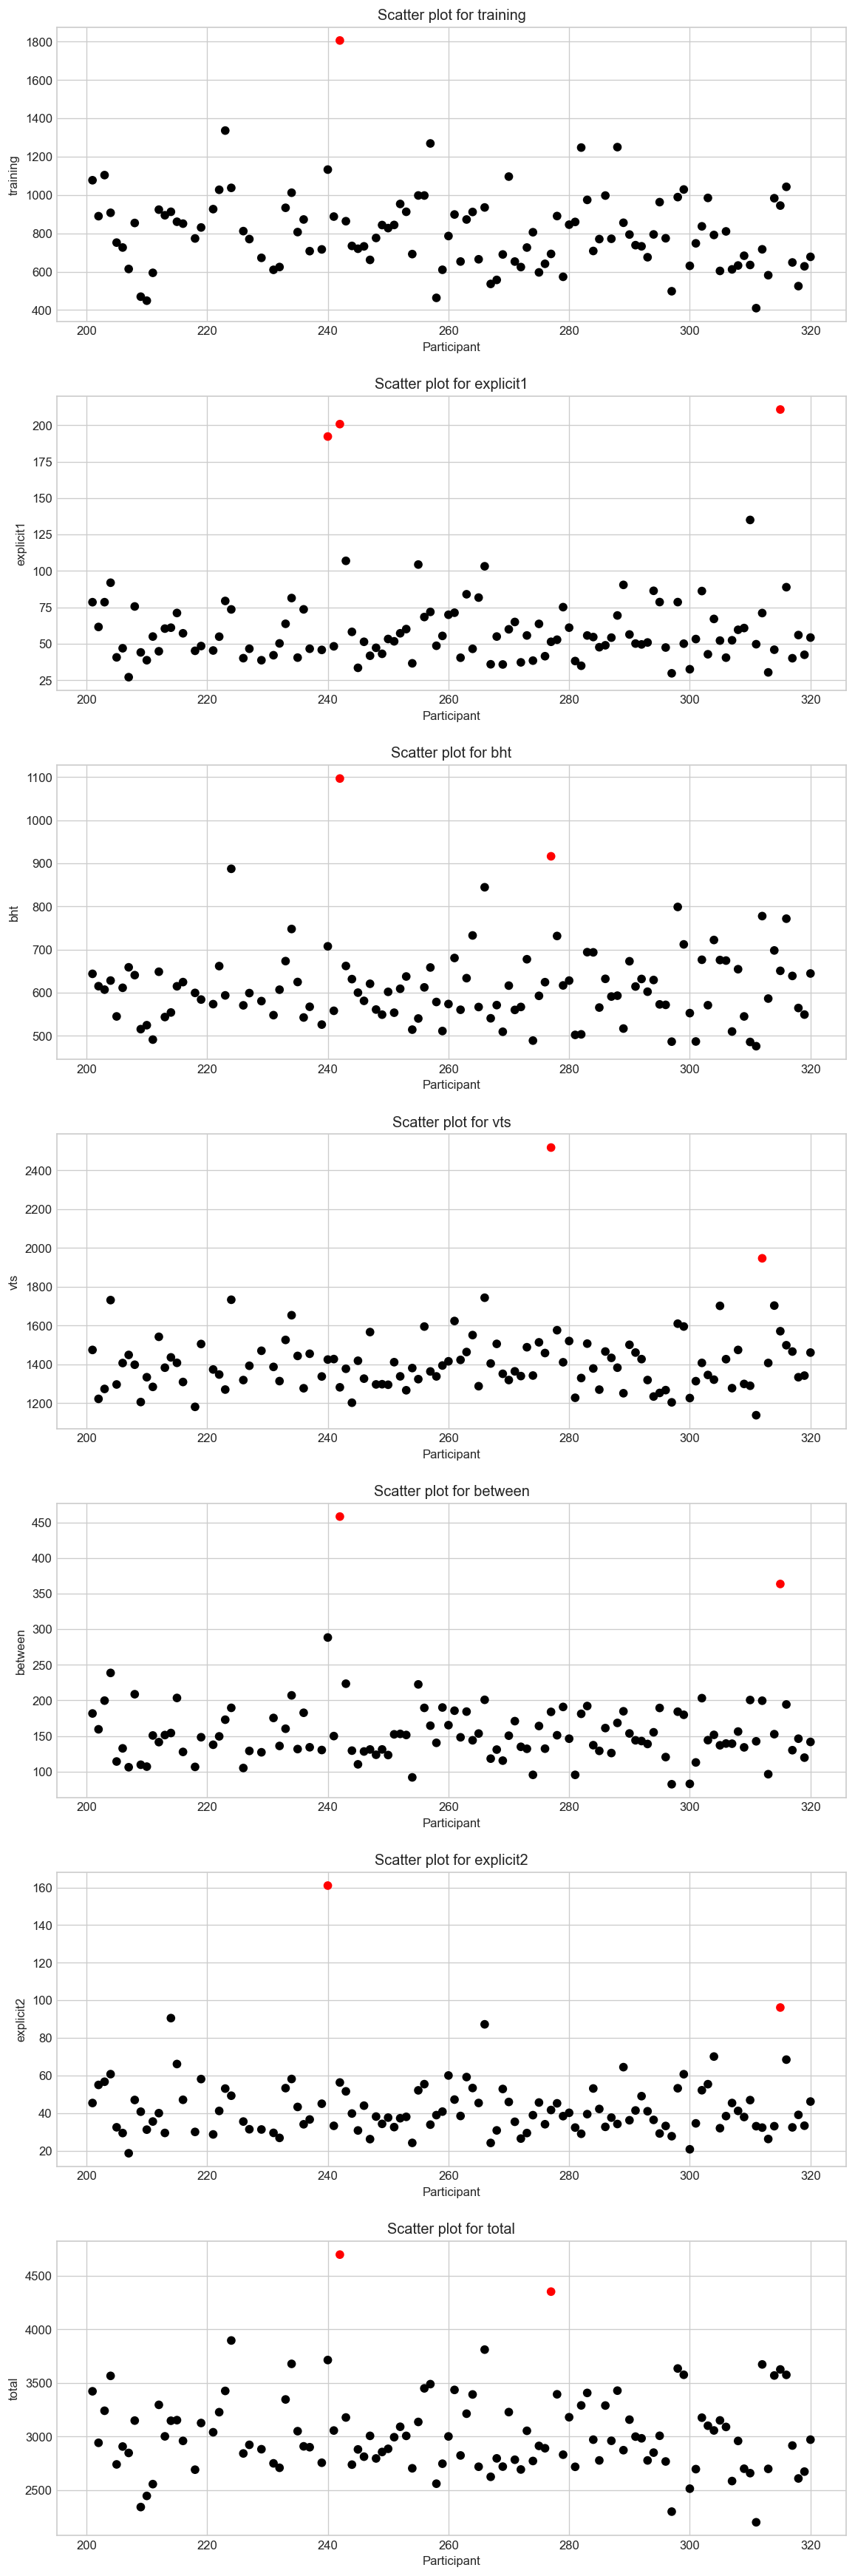

In [21]:
# Function to plot outliers
cols_to_plots = dur2.loc[:,'training':'total'].columns
def plot_outliers(variable, ax):
    outliers_col = f'{variable}_outl'
    outliers = dur2[dur2[outliers_col]][['participant', variable]]

    ax.scatter(dur2['participant'], dur2[variable], color=dur2[outliers_col].map({True: 'red', False: 'black'}))
    ax.set_title(f'Scatter plot for {variable}')
    ax.set_xlabel('Participant')
    ax.set_ylabel(variable)
    ax.grid(True)

    # Add text labels for red-marked outliers
    # for participant, value in outliers[['participant', variable]].iterrows():
    #     ax.text(participant, value[variable], str(int(participant)), color='red', ha='center', va='bottom')

# Create subplots
fig, axes = plt.subplots(nrows=len(cols_to_plots), ncols=1, figsize=(10, 4.2 * (len(cols_to_plots))))

# Plot each variable (excluding logical columns)
for i, col in enumerate(cols_to_plots):
    plot_outliers(col, axes[i])

plt.tight_layout(pad=2.0)
plt.show()


No switches

In [31]:
sw1 = d3.groupby(['id', 'condition'])['switch'].agg('sum')
sw1 = pd.DataFrame(sw1)
sw1.reset_index(inplace=True)
sw1

# sw1['switch'].agg(['mean','std'])

,id,condition,switch
0,201,1,100
1,202,0,90
2,203,1,97
3,204,0,105
4,205,1,130
...,...,...,...
109,316,0,108
110,317,1,105
111,318,0,0
112,319,1,74


In [32]:
sw2 = sw1.copy(0)
sw2['switch'] = sw2['switch'].dropna().astype(int)
sw2

,id,condition,switch
0,201,1,100
1,202,0,90
2,203,1,97
3,204,0,105
4,205,1,130
...,...,...,...
109,316,0,108
110,317,1,105
111,318,0,0
112,319,1,74


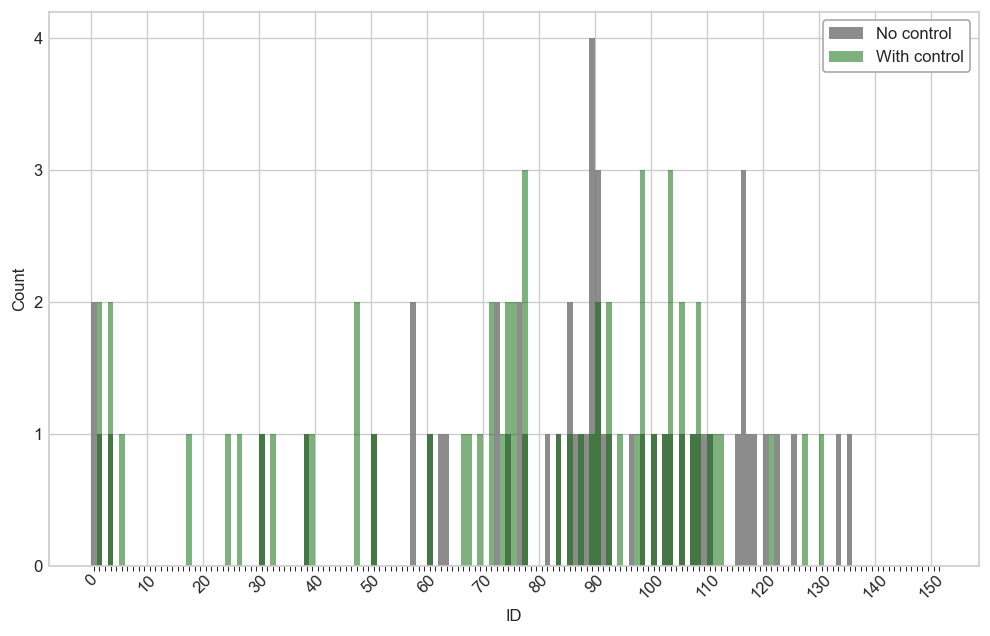

In [24]:
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(10, 6))

# plt.hist(sw2['switch'], bins=range(min(sw2['switch']), max(sw2['switch'])), color='blue')
plt.hist(sw2[sw2['condition'] == 0]['switch'], bins=range(min(sw2['switch']), max(sw2['switch'])), 
         color='grey', alpha=0.9, label='No control')
plt.hist(sw2[sw2['condition'] == 1]['switch'], bins=range(min(sw2['switch']), max(sw2['switch'])), 
         color='darkgreen', alpha=0.5, label='With control')

plt.xticks(np.arange(0, max(sw2['switch']), 10))

major_ticks = np.arange(0, max(sw2['switch']), 1) # Set x-axis ticks every 1 unit
plt.xticks(major_ticks)
major_ticklabels = np.arange(0, max(sw2['switch']), 10) # Set x-axis labels every 10 units
plt.xticks(major_ticklabels, rotation=45)
plt.xlabel('ID')
plt.ylabel('Count')

minor_ticks = np.arange(0.5, max(sw2['switch']), 1) # Set minor ticks every 1 unit (without labels)
plt.gca().xaxis.set_minor_locator(ticker.FixedLocator(minor_ticks))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(which='minor', size=3)  # Adjust the size of minor ticks

plt.legend(edgecolor='darkgrey', framealpha=1, frameon=True)
plt.show()

In [33]:
sw2 = sw1[sw1['switch'] == 0]
sw2

sw1[sw1['switch'] < 10]

,id,condition,switch
15,216,0,0
29,235,1,1
42,249,1,3
51,258,0,1
90,297,1,3
93,300,0,3
98,305,1,5
104,311,1,1
111,318,0,0


In [26]:
# Calculate the IQR (Interquartile Range)
Q1 = sw1['switch'].quantile(0.25)
Q3 = sw1['switch'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = sw1[(sw1['switch'] < lower_bound) | (sw1['switch'] > upper_bound)]
outliers.reset_index(inplace=True, drop=True)
outliers

,id,condition,switch
0,216,0,0
1,235,1,1
2,249,1,3
3,258,0,1
4,297,1,3
5,300,0,3
6,305,1,5
7,311,1,1
8,318,0,0


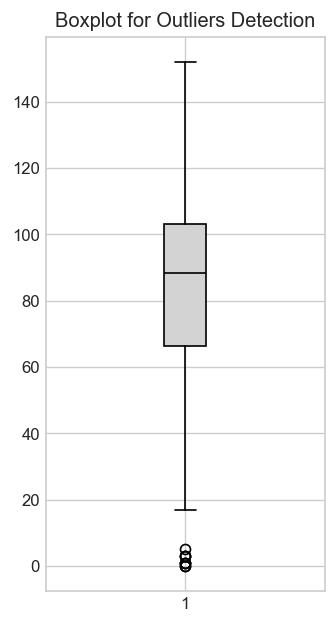

In [27]:
plt.subplots(figsize=(3, 6))

# plt.boxplot(sw1['switch'])

# Create a boxplot with customized appearance
plt.boxplot(sw1['switch'], patch_artist=True, boxprops=dict(facecolor='lightgrey'), whiskerprops=dict(color='black'), capprops=dict(color='black'), medianprops=dict(color='black'))

# Scatter outliers with black fill and alpha = 0.7
outliers = sw1[(sw1['switch'] < lower_bound) | (sw1['switch'] > upper_bound)]
# plt.scatter(outliers.index + 1, outliers['switch'], color='black', alpha=0.7, label='Outliers')

plt.title('Boxplot for Outliers Detection')
plt.show()

In [28]:
# Get IDs of outliers
out_swi = sw2['id'].unique()
out_swi

array([216, 318], dtype=int64)

Perform cleaning

In [82]:
# out_acc
# out_durs
# out_swi

d3 # 23976  rows × 25 columns

exclude_ids = []
# Extend the list with arr2 and arr3
exclude_ids.extend(out_acc)
exclude_ids.extend(out_durs)
# exclude_ids.extend(out_swi)

d4 = d3[~d3['id'].isin(exclude_ids)]
d4 # 22032  rows × 25 columns

d4['id'].nunique()

108

In [83]:
exclude_ids

[231, 246, 300, 242, 277, 315]

In [84]:
# Other datasets

# e1 # explicit
e1c = e1[~e1['id'].isin(exclude_ids)]

# bp1 # bht problems
bp1c = bp1[~bp1['participant'].isin(exclude_ids)]

# b2 # bht main
b2c = b2[~b2['id'].isin(exclude_ids)]


## Cleaning trials

In [71]:
# Calculate IB
d5 = d4.copy()
d5 = d5[~d5['ib_estimation'].isin([-1])] # remove lacking IB ratings

d5['ib'] = (d5['ib_estimation']/10) - d5['fb_delay']  # calculate IB

# Merge with person-level data
d6 = d5.merge(bg2m, how='outer')
d6 = d6.merge(ec2[['id','nasa','agef1','agef2','agef3','agef4']] )
d6

# Calculate mean and standard deviation for each ID
d6['rt_mean'] = d6.groupby('id')['rt'].transform('mean')
d6['rt_std'] = d6.groupby('id')['rt'].transform('std')
d6['ib_mean'] = d6.groupby('id')['ib'].transform('mean')
d6['ib_std'] = d6.groupby('id')['ib'].transform('std')
d6

# Fill with NaN
outliers_rt = (d6['rt'] < d6['rt_mean'] - 3 * d6['rt_std']) | (d6['rt'] > d6['rt_mean'] + 3 * d6['rt_std'])
d6.loc[outliers_rt, 'rt'] = float('nan')
outliers_ib = (d6['ib'] < d6['ib_mean'] - 3 * d6['ib_std']) | (d6['ib'] > d6['ib_mean'] + 3 * d6['ib_std'])
d6.loc[outliers_ib, 'ib'] = float('nan')

# Clean IB data due to high correlation between start and report point
d6.loc[d6['id'].isin(out_ib), 'ib'] = np.nan # replace with nans

d6 

,id,sex,age,condition,cb,frame_rate,training_vts,enable_ib,trial_time,trial_nr,...,BHT_acc,nasa,agef1,agef2,agef3,agef4,rt_mean,rt_std,ib_mean,ib_std
0,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h35.58.262,0,...,1,3.5,6,4,5,5,1.96456,0.29252,-0.18922,0.2698
1,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.08.011,1,...,1,3.5,6,4,5,5,1.96456,0.29252,-0.18922,0.2698
2,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.14.596,2,...,1,3.5,6,4,5,5,1.96456,0.29252,-0.18922,0.2698
3,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.23.138,3,...,1,3.5,6,4,5,5,1.96456,0.29252,-0.18922,0.2698
4,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.30.678,4,...,1,3.5,6,4,5,5,1.96456,0.29252,-0.18922,0.2698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22115,320,Kobieta,19,0,1,60.01,0,1,2024-02-09_12h51.43.055,67,...,NaN,5.75,1,1,6,7,2.05403,0.20378,-0.27546,0.17679
22116,320,Kobieta,19,0,1,60.01,0,1,2024-02-09_12h51.50.695,68,...,NaN,5.75,1,1,6,7,2.05403,0.20378,-0.27546,0.17679
22117,320,Kobieta,19,0,1,60.01,0,1,2024-02-09_12h51.56.781,69,...,NaN,5.75,1,1,6,7,2.05403,0.20378,-0.27546,0.17679
22118,320,Kobieta,19,0,1,60.01,0,1,2024-02-09_12h52.02.186,70,...,NaN,5.75,1,1,6,7,2.05403,0.20378,-0.27546,0.17679


In [73]:
d6.to_csv('d6.csv')

# EDA

### VTS

#### VSR

In [45]:
d4.groupby('condition')['switch'].value_counts(normalize=True)
d4.groupby(['block_nr'])['switch'].value_counts(normalize=True)
# d4

block_nr  switch
1         0        0.55142
          1        0.44858
2         0        0.60533
          1        0.39467
3         0        0.61512
          1        0.38488
Name: proportion, dtype: float64

In [46]:
# Get VSR values per id
rd3 = d4.groupby(['id', 'condition'])['switch'].value_counts(normalize=True)
rd3 = pd.DataFrame(rd3)
rd3.rename(columns={'proportion':'vsr'}, inplace=True)
rd3.reset_index(inplace=True)
rd3 = rd3[rd3['switch'] == 1]
rd3.drop('switch', axis=1,inplace=True)
rd3.reset_index(inplace=True, drop=True)

rd3

,id,condition,vsr
0,201,1,0.5102
1,202,0,0.43902
2,203,1,0.51872
3,204,0,0.5198
4,205,1,0.625
...,...,...,...
101,314,0,0.58095
102,316,0,0.50943
103,317,1,0.5198
104,319,1,0.35749


In [48]:
rd3[rd3['vsr']< .1]

,id,condition,vsr
27,235,1,0.00526
38,249,1,0.01587
47,258,0,0.00592
85,297,1,0.01562
92,305,1,0.02747
98,311,1,0.00476
103,318,0,0.00513


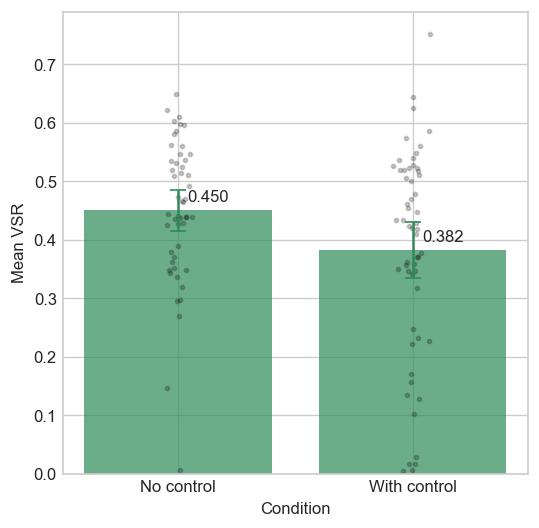

In [93]:
rs = rd3.copy()

# Grouping by 'condition' and calculating mean and standard deviation for 'vsr'
grouped = rs.groupby('condition')['vsr'].agg(['mean', 'std'])
plt.figure(figsize=(5, 5))  # Adjust the width and height of the figure

# Calculate standard error
se = rs.groupby('condition')['vsr'].sem()

# Plotting the data with error bars
plt.bar(grouped.index, grouped['mean'], alpha=0.7, color = 'seagreen') # can use yerr=grouped['std'] to have SD error bars
plt.errorbar(grouped.index, grouped['mean'], yerr=2 * se, fmt='none', ecolor = 'seagreen', capsize=5)

plt.xlabel('Condition')
plt.ylabel('Mean VSR')
plt.xticks(grouped.index, ['No control', 'With control'])  # Set x-axis ticks to match 'condition' values
plt.grid(True)

# Scatter plot of individual observations behind the bars with reduced alpha
for i, condition in enumerate(rs['condition']):
    plt.scatter(grouped.index[condition] + np.random.normal(0, 0.03), rs['vsr'][i], color='black', alpha=0.2, s = 6)

# Adding text labels for mean vsr values at each point
for i, mean_vsr in enumerate(grouped['mean']):
    plt.text(grouped.index[i] + 0.13, mean_vsr + 0.01, f'{mean_vsr:.3f}', ha='center', va='bottom')

plt.show()

Plot

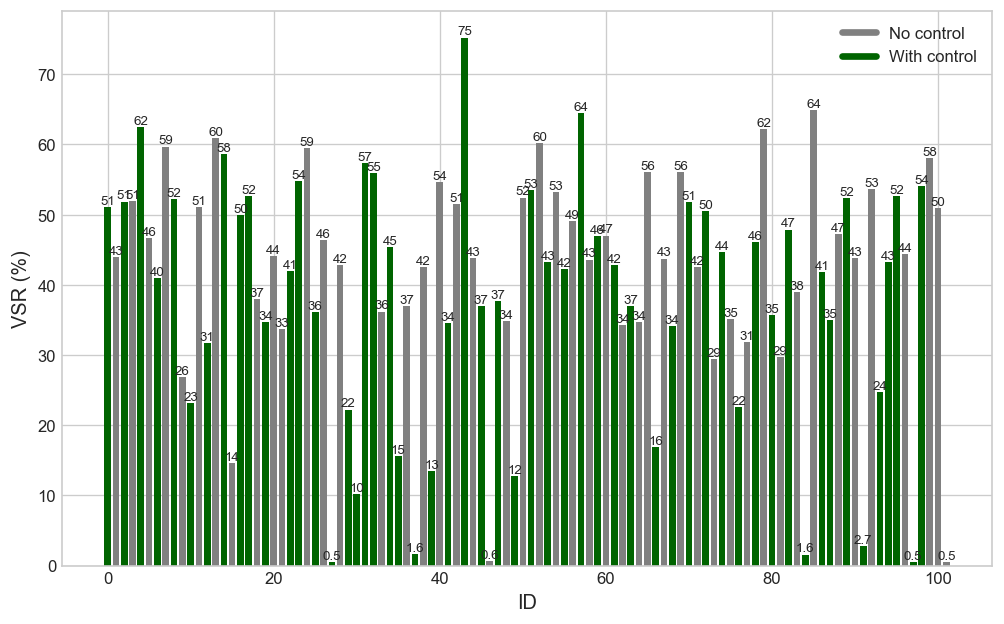

In [40]:
from matplotlib.lines import Line2D

df = rd3.copy()

# Sorting DataFrame based on 'vsr' values in descending order
# df = df.sort_values(by='vsr', ascending=False)

# Extracting the 'vsr' values and their respective indices
vsr_values = df['vsr'] * 100
indices = df.index

# Grouping colors based on 'condition' column
colors = ['grey' if condition == 0 else 'darkgreen' for condition in df['condition']]

# Create a dictionary to map conditions to unique colors
unique_conditions = df['condition'].unique()
color_dict = {0: 'grey', 1: 'darkgreen'}

# Plotting as a bar plot with color grouping
plt.figure(figsize=(10, 6))  # Adjust the width and height of the figure
bars = plt.bar(range(len(vsr_values)), vsr_values, color=colors, label='Condition')  # Add label for legend
plt.xlabel('ID')
plt.ylabel('VSR (%)')

# Adding text annotations for each bar
for bar, v in zip(bars, vsr_values):
    label_text = f'{v:.1f}' if v < 10 else f'{int(v)}'
    plt.text(bar.get_x() + bar.get_width() / 2, v, label_text, ha='center', va='bottom', size=8)


legend_elements = [
    Line2D([0], [0], color='grey', lw=4, label='No control'),
    Line2D([0], [0], color='darkgreen', lw=4, label='With control')
]

# Set x-axis ticks and labels
# plt.xticks(range(len(indices)), indices)

plt.legend(handles=legend_elements)
plt.show()

By blocks

In [94]:
# Get VSR values per id
rd3b = d4.groupby(['id', 'block_nr', 'condition'])['switch'].value_counts(normalize=True)
rd3b = pd.DataFrame(rd3b)
rd3b.rename(columns={'proportion':'vsr'}, inplace=True)
rd3b.reset_index(inplace=True)
rd3b = rd3b[rd3b['switch'] == 1]
rd3b.drop('switch', axis=1,inplace=True)
rd3b.reset_index(inplace=True, drop=True)

rd3b

,id,block_nr,condition,vsr
0,201,1,1,0.5493
1,201,2,1,0.53125
2,201,3,1,0.44262
3,202,1,0,0.51389
4,202,2,0,0.44776
...,...,...,...,...
299,319,2,1,0.30882
300,319,3,1,0.32836
301,320,1,0,0.49296
302,320,2,0,0.55556


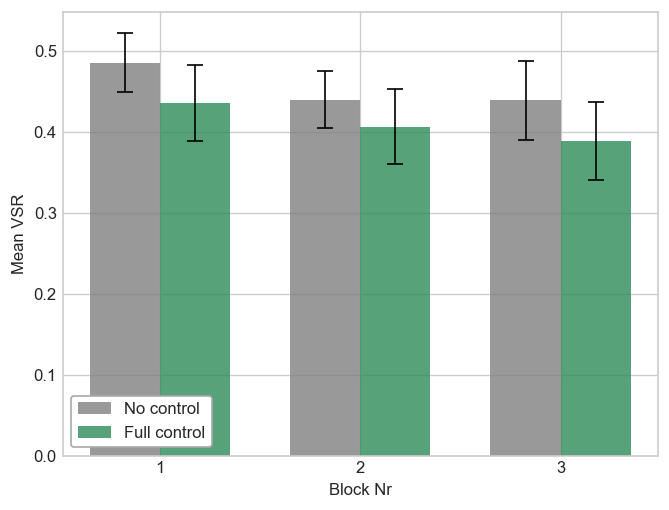

In [95]:
rsb = rd3b.copy()

# Grouping by 'condition' and calculating mean and standard deviation for 'vsr'
grouped = rsb.groupby(['condition','block_nr'])['vsr'].agg(['mean', 'std'])

# Calculate standard error
se = rsb.groupby(['condition','block_nr'])['vsr'].sem()

grouped['se'] = se
grouped.reset_index(inplace=True)
grouped

df = grouped

# Get unique conditions
conditions = df['condition'].unique()

fig, ax = plt.subplots()

bar_width = 0.35  # Width of the bars
index = df['condition'].unique()  # Index for the x-axis

# Modify condition names and colors
conditions_names = {0: 'No control', 1: 'Full control'}
conditions_colors = {0: 'gray', 1: 'seagreen'}

# Plotting loop
for i, condition in enumerate(conditions):
    condition_data = df[df['condition'] == condition]
    x_values = np.arange(len(condition_data['block_nr'])) + i * bar_width
    y = condition_data['mean']
    ax.bar(x_values, y, width=bar_width, label=conditions_names[condition], alpha=0.8, color=conditions_colors[condition])
    ax.errorbar(x_values, y, yerr=condition_data['se'] * 2, fmt='none', ecolor='black', capsize=5, lw = 1)

# Adding labels and title
ax.set_xlabel('Block Nr')
ax.set_ylabel('Mean VSR')
ax.set_xticks(np.arange(len(df['block_nr'].unique())) + bar_width / 2)
ax.set_xticklabels(df['block_nr'].unique())
ax.legend(edgecolor='darkgrey', framealpha=1, frameon=True, loc = 'lower left')

plt.show()

#### RT

In [98]:
# Calculate mean and standard deviation for a numeric variable
d4.groupby('condition')['rt'].agg(['mean', 'std'])

d5rt = d4.groupby(['id','condition'])['rt'].agg(['mean', 'std'])
d5rt.reset_index(inplace=True)
d5rt

,id,condition,mean,std
0,201,1,1.91319,0.3632
1,202,0,1.76991,0.23243
2,203,1,2.03458,0.55799
3,204,0,2.33852,0.5854
4,205,1,1.99551,0.31586
...,...,...,...,...
103,316,0,2.00759,0.25456
104,317,1,2.1935,0.58115
105,318,0,2.10046,0.35729
106,319,1,1.87269,0.24947


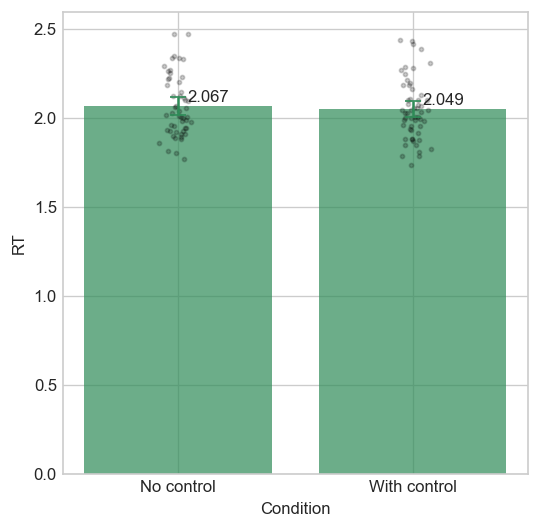

In [99]:
# rrt = d5rt.copy()

# Grouping by 'condition' and calculating mean and standard deviation for 'vsr'
grouped = d5rt.groupby('condition')['mean'].agg(['mean', 'std'])
plt.figure(figsize=(5, 5))  # Adjust the width and height of the figure

# Calculate standard error
se = d5rt.groupby('condition')['mean'].sem()

# Plotting the data with error bars
plt.bar(grouped.index, grouped['mean'], alpha=0.7, color = 'seagreen') # can use yerr=grouped['std'] to have SD error bars
plt.errorbar(grouped.index, grouped['mean'], yerr=2 * se, fmt='none', ecolor = 'seagreen', capsize=5)

plt.xlabel('Condition')
plt.ylabel('RT')
plt.xticks(grouped.index, ['No control', 'With control'])  # Set x-axis ticks to match 'condition' values
plt.grid(True)

# Scatter plot of individual observations behind the bars with reduced alpha
for i, condition in enumerate(d5rt['condition']):
    plt.scatter(grouped.index[condition] + np.random.normal(0, 0.03), d5rt['mean'][i], color='black', alpha=0.2, s = 6)

# Adding text labels for mean vsr values at each point
for i, mean_vsr in enumerate(grouped['mean']):
    plt.text(grouped.index[i] + 0.13, mean_vsr + 0.01, f'{mean_vsr:.3f}', ha='center', va='bottom')

plt.show()

#### Accuracy

In [100]:
# Calculate proportions for a categorical variable ('correct')
d4.groupby('condition')['correct'].value_counts(normalize=True)

d5a = d4.groupby(['id', 'condition']).agg({'correct': 'mean'}).reset_index()
d5a.rename(columns={'correct': 'accuracy'}, inplace=True)
d5a
d3a

,id,condition,accuracy
0,201,1,0.95098
1,202,0,0.99048
2,203,1,0.9801
3,204,0,0.92754
4,205,1,0.98578
...,...,...,...
109,316,0,1
110,317,1,0.98086
111,318,0,0.99512
112,319,1,0.9763


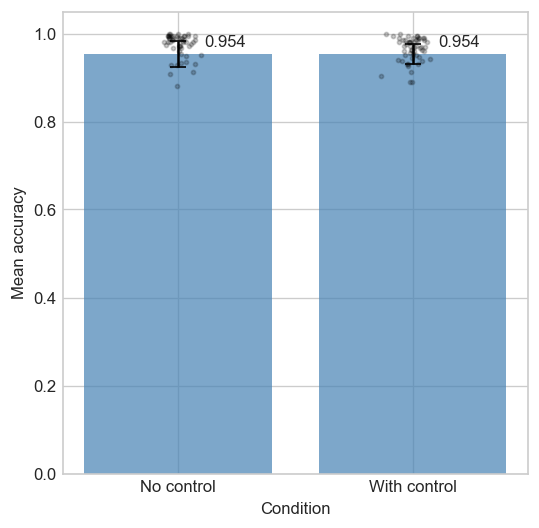

In [101]:
# Grouping by 'condition' and calculating mean and standard deviation 
grouped = d3a.groupby('condition')['accuracy'].agg(['mean', 'std'])
plt.figure(figsize=(5, 5))  # Adjust the width and height of the figure

# Calculate standard error
se = d3a.groupby('condition')['accuracy'].sem()

# Plotting the data with error bars
plt.bar(grouped.index, grouped['mean'], alpha=0.7, color = 'steelblue') # can use yerr=grouped['std'] to have SD error bars
plt.errorbar(grouped.index, grouped['mean'], yerr=2 * se, fmt='none', ecolor = 'black', capsize=5)

plt.xlabel('Condition')
plt.ylabel('Mean accuracy')
plt.xticks(grouped.index, ['No control', 'With control'])  # Set x-axis ticks to match 'condition' values
# plt.axhline(y=0.65, color='grey', linestyle='--', lw=1)

# Scatter plot of individual observations behind the bars with reduced alpha
for i, condition in enumerate(d5a['condition']):
    plt.scatter(grouped.index[condition] + np.random.normal(0, 0.04), d5a['accuracy'][i], color='black', alpha=0.2, s = 6)

# Adding text labels for mean vsr values at each point
for i, mean in enumerate(grouped['mean']):
    plt.text(grouped.index[i] + 0.2, mean + 0.01, f'{mean:.3f}', ha='center', va='bottom')

plt.show()

## IB

### VTS IB

In [26]:
d5 = d4.copy()
d5 = d5[~d5['ib_estimation'].isin([-1])] # remove lacking IB ratings

d5['ib'] = (d5['ib_estimation']/10) - d5['fb_delay']  # calculate IB

d5

,id,sex,age,condition,cb,frame_rate,training_vts,enable_ib,trial_time,trial_nr,...,correct,task,rt,fb_delay,fb_delay_index,ib_estimation,ib_rt,ib_start,switch,ib
24,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h35.58.262,0,...,0,2,1.76,0.9,0,7,5.29,6,NaN,-0.2
25,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.08.011,1,...,1,2,1.9,0.6,1,3,2.27,3,0,-0.3
26,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.14.596,2,...,1,2,2,0.9,2,1,3.81,2,0,-0.8
27,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.23.138,3,...,1,2,2.19,0.6,3,5,2.94,8,0,-0.1
28,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.30.678,4,...,1,1,1.92,0.9,4,4,1.96,3,1,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26635,318,Kobieta,26,0,2,59.99,0,1,2024-02-02_15h45.25.876,67,...,1,2,2.26,0.3,67,7,1.12,7,0,0.4
26636,318,Kobieta,26,0,2,59.99,0,1,2024-02-02_15h45.31.371,68,...,1,2,1.96,0.6,68,5,1.72,6,0,-0.1
26637,318,Kobieta,26,0,2,59.99,0,1,2024-02-02_15h45.37.465,69,...,1,2,1.82,0.9,69,4,1.95,6,0,-0.5
26638,318,Kobieta,26,0,2,59.99,0,1,2024-02-02_15h45.43.947,70,...,1,2,1.79,0.6,70,2,0.68,2,0,-0.4


Correlation of starting and reported time

In [39]:
correlation_within_id = d5.groupby('id')[['ib_estimation', 'ib_start']].corr().iloc[0::2, -1].reset_index()
correlation_within_id

,id,level_1,ib_start
0,201,ib_estimation,0.1454
1,202,ib_estimation,0.03352
2,203,ib_estimation,0.51092
3,204,ib_estimation,0.29824
4,205,ib_estimation,0.55015
...,...,...,...
103,316,ib_estimation,0.05107
104,317,ib_estimation,-0.0318
105,318,ib_estimation,0.85757
106,319,ib_estimation,0.1028


In [77]:
# hicors = correlation_within_id[correlation_within_id['ib_start'] > 0.5]
hicors = correlation_within_id[correlation_within_id['ib_start'] > 0.8]
hicors = hicors.drop(columns=['level_1'])
# hicors = hicors.sort_values(by='ib_start', ascending=False)
hicors.reset_index(inplace=True,drop=True)

out_ib = hicors['id'].unique()
out_ib

array([211, 229, 301, 318], dtype=int64)

In [90]:
# Same for BHT

correlation_within_id_bht = b3.groupby('id')[['ib_estimation', 'ib_start']].corr().iloc[0::2, -1].reset_index()
correlation_within_id_bht

# hicors_bht = correlation_within_id_bht[correlation_within_id_bht['ib_start'] > 0.5]
hicors_bht = correlation_within_id_bht[correlation_within_id_bht['ib_start'] > 0.8]
hicors_bht = hicors_bht.drop(columns=['level_1'])
# hicors_bht = hicors_bht.sort_values(by='ib_start', ascending=False)
hicors_bht.reset_index(inplace=True,drop=True)

out_ib_bht = hicors_bht['id'].unique()
out_ib_bht

array([211, 229, 301], dtype=int64)

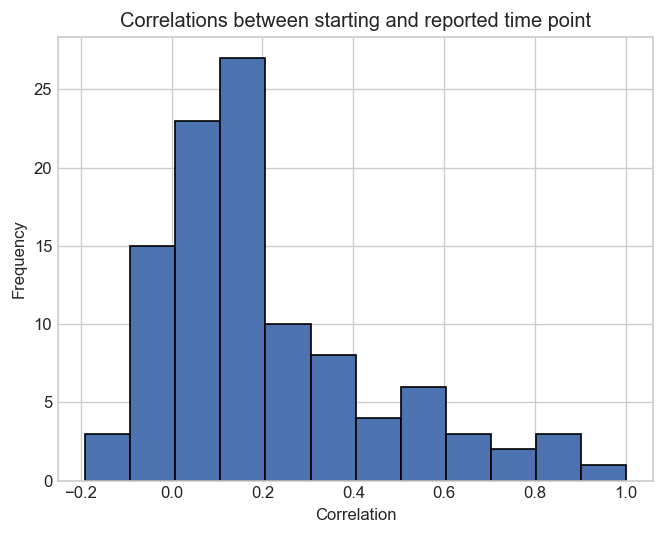

In [96]:
# Plot histogram
plt.hist(correlation_within_id['ib_start'], bins=12, edgecolor='black')
plt.title('Correlations between starting and reported time point')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.show()

Variance across subjects

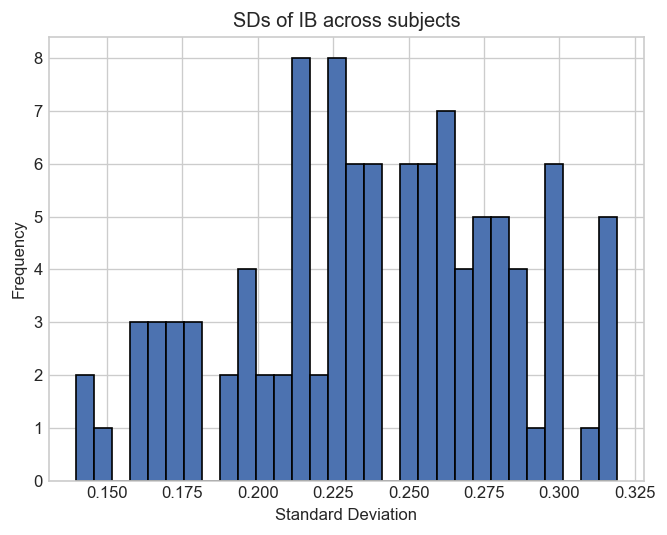

In [12]:
dvar = d5.groupby('id')['ib'].agg('std')

dvar.hist(bins=30, edgecolor='black')
plt.title('SDs of IB across subjects')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.show()

Plot

In [103]:
# grouped = d5.groupby(['id','condition'])['ib'].agg('mean')
# grouped
# del rs

rs = d5.groupby(['id','condition'])['ib'].agg('mean')
rs = pd.DataFrame(rs)
rs.reset_index(inplace=True)
rs

,id,condition,ib
0,201,1,-0.18922
1,202,0,-0.08429
2,203,1,-0.18308
3,204,0,-0.14783
4,205,1,-0.09431
...,...,...,...
103,316,0,-0.08879
104,317,1,-0.12392
105,318,0,-0.14098
106,319,1,-0.10379


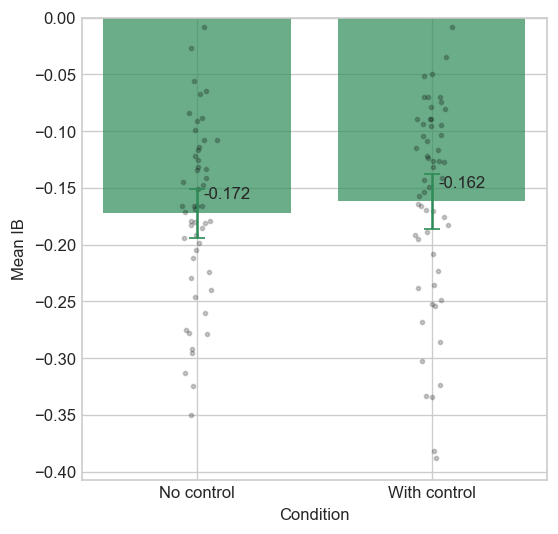

In [104]:
# Grouping by 'condition' and calculating mean and standard deviation for 'vsr'
grouped = rs.groupby('condition')['ib'].agg(['mean', 'std'])
plt.figure(figsize=(5, 5))  # Adjust the width and height of the figure

# Calculate standard error
se = rs.groupby('condition')['ib'].sem()

# Plotting the data with error bars
plt.bar(grouped.index, grouped['mean'], alpha=0.7, color = 'seagreen') # can use yerr=grouped['std'] to have SD error bars
plt.errorbar(grouped.index, grouped['mean'], yerr=2 * se, fmt='none', ecolor = 'seagreen', capsize=5)

plt.xlabel('Condition')
plt.ylabel('Mean IB')
plt.xticks(grouped.index, ['No control', 'With control'])  # Set x-axis ticks to match 'condition' values
plt.grid(True)

# Scatter plot of individual observations behind the bars with reduced alpha
for i, condition in enumerate(rs['condition']):
    plt.scatter(grouped.index[condition] + np.random.normal(0, 0.03), rs['ib'][i], color='black', alpha=0.2, s = 6)

# Adding text labels for mean vsr values at each point
for i, mean in enumerate(grouped['mean']):
    plt.text(grouped.index[i] + 0.13, mean + 0.01, f'{mean:.3f}', ha='center', va='bottom')

plt.show()

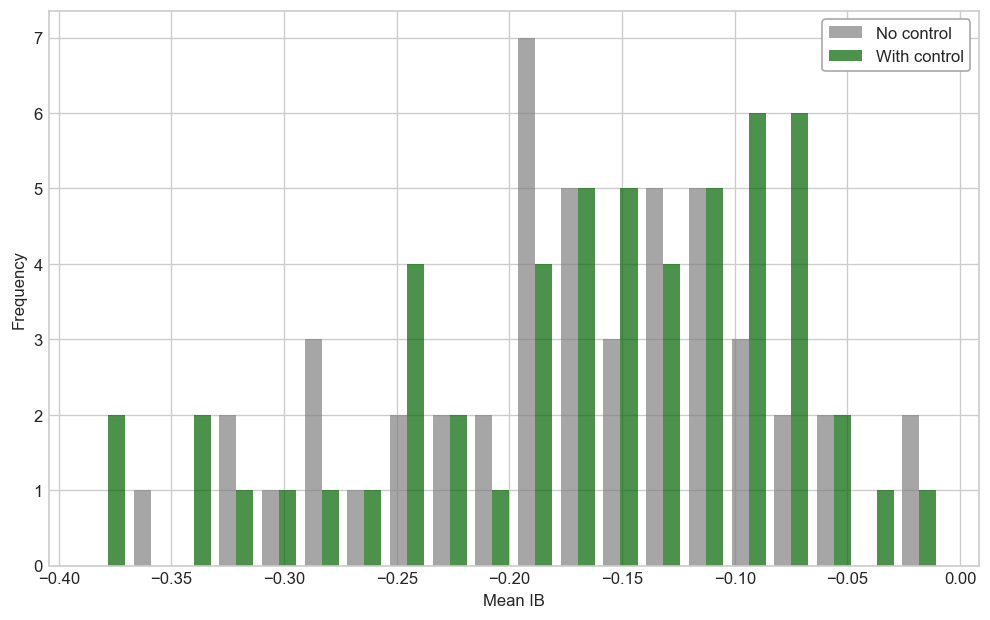

In [ ]:
df = d5.groupby(['id','condition'])['ib'].agg('mean')
df = pd.DataFrame(df)
df.reset_index(inplace=True)

# Create a histogram with color-coded bars
colors = {0: 'grey', 1: 'darkgreen'}  # Define colors for conditions
df['condition_color'] = df['condition'].map(colors)

plt.figure(figsize=(10, 6))
plt.hist([df[df['condition'] == 0]['ib'], df[df['condition'] == 1]['ib']],
         bins=20, alpha=0.7, color=['grey', 'darkgreen'], label=['No control', 'With control'])
# plt.xticks(np.arange(-.4, 0, .01))

plt.xlabel('Mean IB')
plt.ylabel('Frequency')
plt.legend(edgecolor='darkgrey', framealpha=1, frameon=True)
plt.show()

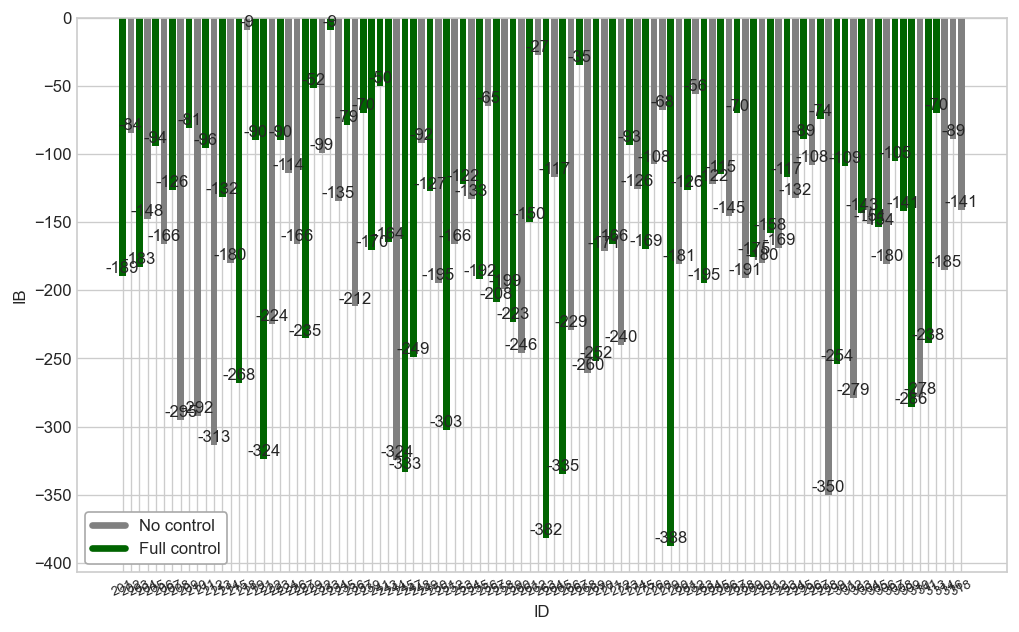

In [ ]:
df = d5.groupby(['id','condition'])['ib'].describe()
df.reset_index(inplace=True)

# Extracting the 'vsr' values and their respective indices
ib_values = df['mean'] * 1000
indices = df.index
ids = df['id'].unique()

# Grouping colors based on 'condition' column
colors = ['grey' if condition == 0 else 'darkgreen' for condition in df['condition']]

# Create a dictionary to map conditions to unique colors
unique_conditions = df['condition'].unique()
color_dict = {0: 'grey', 1: 'darkgreen'}

# Plotting as a bar plot with color grouping
plt.figure(figsize=(10, 6))  # Adjust the width and height of the figure
bars = plt.bar(range(len(ib_values)), ib_values, color=colors, label='Condition')  # Add label for legend
plt.xlabel('ID')
plt.ylabel('IB')
plt.xticks(range(len(ib_values)), ids, rotation=25, fontsize=8)  # Set x-axis ticks to match indices

# Adding text annotations for each bar
for bar, v in zip(bars, ib_values):
    plt.text(bar.get_x() + bar.get_width() / 2, v, f'{v:.0f}', ha='center', va='bottom')

# Creating a legend based on unique conditions
# legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
#                               label=f'Condition {condition}', markerfacecolor=color_dict[condition], markersize=10) for condition in unique_conditions]

legend_elements = [
    Line2D([0], [0], color='grey', lw=4, label='No control'),
    Line2D([0], [0], color='darkgreen', lw=4, label='Full control')
]

# plt.legend(handles=legend_elements)
plt.legend(handles=legend_elements, edgecolor='darkgrey', framealpha=1, frameon=True, loc = 'lower left')

plt.show()

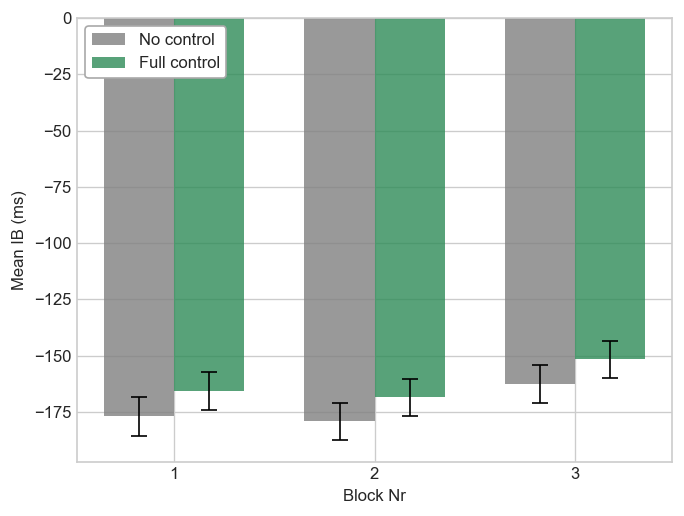

In [105]:
rib = d5.groupby(['condition', 'block_nr'])['ib'].agg(['mean','std','sem'])
rib.reset_index(inplace=True)
rib

grouped = rib.copy()
grouped[['mean', 'std', 'sem']] *= 1000
# grouped[['mean', 'std', 'sem']] = grouped[['mean', 'std', 'sem']].round(decimals=1)
grouped = grouped.apply(lambda x: x.round(1) if x.name in ['mean', 'std', 'sem'] else x)

df = grouped

# Get unique conditions
conditions = df['condition'].unique()

fig, ax = plt.subplots()

bar_width = 0.35  # Width of the bars
index = df['condition'].unique()  # Index for the x-axis

# Modify condition names and colors
conditions_names = {0: 'No control', 1: 'Full control'}
conditions_colors = {0: 'gray', 1: 'seagreen'}

# Plotting loop
for i, condition in enumerate(conditions):
    condition_data = df[df['condition'] == condition]
    x_values = np.arange(len(condition_data['block_nr'])) + i * bar_width
    y = condition_data['mean']
    ax.bar(x_values, y, width=bar_width, label=conditions_names[condition], alpha=0.8, color=conditions_colors[condition])
    ax.errorbar(x_values, y, yerr=condition_data['sem'] * 2, fmt='none', ecolor='black', capsize=5, lw = 1)

# Adding labels and title
ax.set_xlabel('Block Nr')
ax.set_ylabel('Mean IB (ms)')
ax.set_xticks(np.arange(len(df['block_nr'].unique())) + bar_width / 2)
ax.set_xticklabels(df['block_nr'].unique())
ax.legend(edgecolor='darkgrey', framealpha=1, frameon=True, loc = 'upper left')

plt.show()

### IB vs interval

In [ ]:
grouped = d5.groupby(['fb_delay'])['ib'].agg(['mean','std','sem'])
grouped.reset_index(inplace=True)
grouped *= 1000
grouped

,fb_delay,mean,std,sem
0,300,44.5975,176.02378,2.10856
1,600,-170.30329,177.58388,2.12908
2,900,-374.87379,218.63654,2.6258


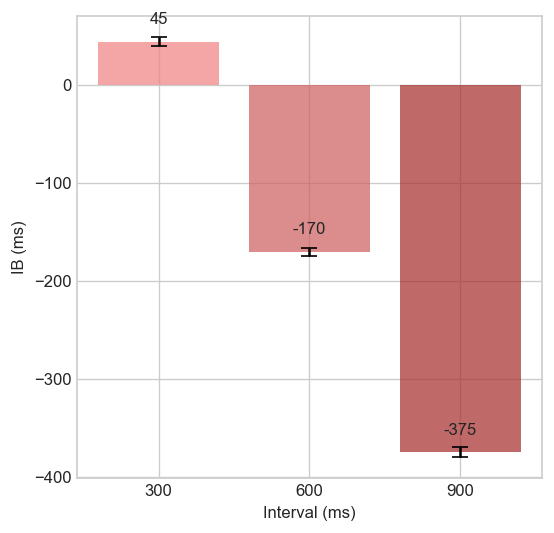

In [ ]:
plt.figure(figsize=(5, 5))  # Adjust the width and height of the figure

# Plotting the data with error bars
plt.bar(grouped.index, grouped['mean'], alpha=0.7, color = ['lightcoral','indianred','brown']) # can use yerr=grouped['std'] to have SD error bars
plt.errorbar(grouped.index, grouped['mean'], yerr=2 * grouped['sem'], fmt='none', ecolor = 'black', capsize=5)

plt.xlabel('Interval (ms)')
plt.ylabel('IB (ms)')
plt.xticks(grouped.index, ['300','600','900'])  # Set x-axis ticks to match 'condition' values

# Adding text labels for mean rt values at each point
for i, mean_vsr in enumerate(grouped['mean']):
    plt.text(grouped.index[i], mean_vsr + 15, f'{mean_vsr:.0f}', ha='center', va='bottom')

plt.show()

In [ ]:
grouped = d5.groupby(['condition','fb_delay'])['ib'].agg(['mean','std','sem'])
grouped.reset_index(inplace=True)
grouped[grouped.columns[grouped.columns != 'condition']] *= 1000
grouped

,condition,fb_delay,mean,std,sem
0,0,300,44.65871,171.63731,3.00287
1,0,600,-175.37382,173.70019,3.03432
2,0,900,-378.14124,213.22276,3.72815
3,1,300,44.54349,179.82908,2.95557
4,1,600,-165.78804,180.87606,2.98165
5,1,900,-371.95522,223.35,3.69085


### VSR vs IB

In [111]:
grouped = d5.groupby(['id', 'condition'])[['switch', 'ib']].agg(['mean', 'std', lambda x: np.std(x, ddof=1) / np.sqrt(len(x))])
grouped.columns = ['switch_mean', 'switch_std', 'switch_se', 'ib_mean', 'ib_std', 'ib_se']
grouped.reset_index(inplace=True)
grouped

,id,condition,switch_mean,switch_std,switch_se,ib_mean,ib_std,ib_se
0,201,1,0.5102,0.50118,0.03509,-0.18922,0.2698,0.01889
1,202,0,0.43902,0.49748,0.03433,-0.08429,0.15861,0.01095
2,203,1,0.51872,0.50099,0.03534,-0.18308,0.25848,0.01823
3,204,0,0.5198,0.50085,0.03481,-0.14783,0.27901,0.01939
4,205,1,0.625,0.48529,0.03341,-0.09431,0.24951,0.01718
...,...,...,...,...,...,...,...,...
100,312,0,0.58586,0.49382,0.03441,-0.18301,0.27471,0.01914
101,313,1,0.5404,0.49963,0.03481,-0.0699,0.27931,0.01946
102,314,0,0.58095,0.49458,0.03389,-0.18498,0.22894,0.01569
103,316,0,0.50943,0.50109,0.03425,-0.08879,0.26067,0.01782


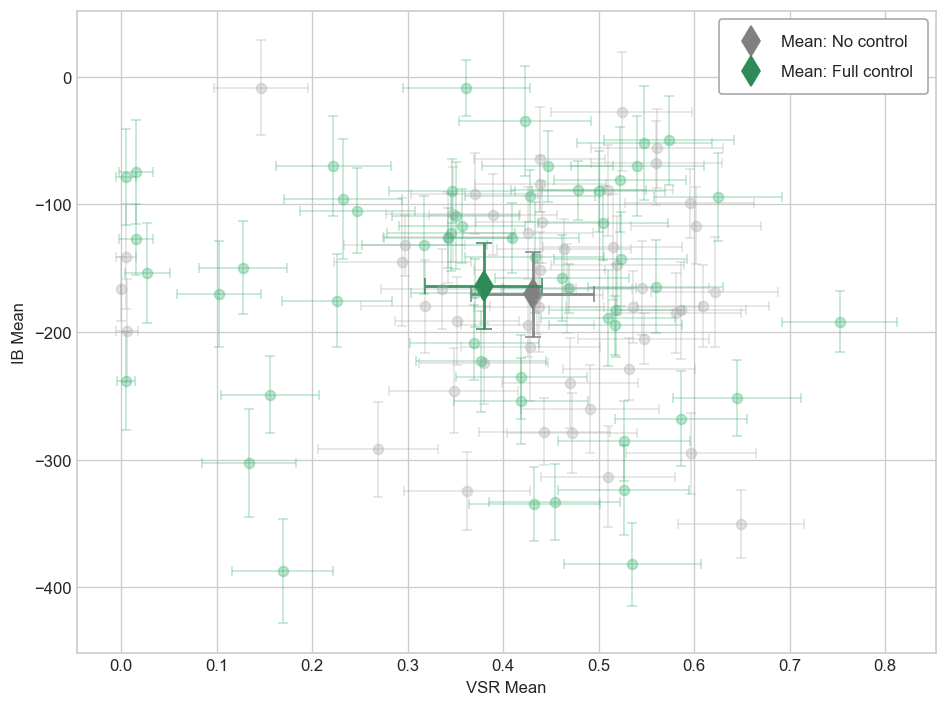

In [118]:
# Define colors and conditions
conditions_names = {0: 'No control', 1: 'Full control'}
conditions_colors = {0: 'darkgrey', 1: 'mediumseagreen'}

# Scatter plot with error bars
plt.figure(figsize=(8, 6))

for condition, color in conditions_colors.items():
    condition_data = grouped[grouped['condition'] == condition]
    plt.errorbar(
        condition_data['switch_mean'],
        condition_data['ib_mean']*1000,
        xerr=2 * condition_data['switch_se'],
        yerr=2 * condition_data['ib_se']*1000,
        fmt='o',
        # label=f'Subjects: {conditions_names[idx]}',
        color=color,
        capsize=3, alpha=0.33, lw=1, 
    )

# Calculate overall means for both conditions
overall_means = grouped.groupby('condition')[['switch_mean', 'ib_mean', 'switch_se', 'ib_se']].mean()

# Plot averaged dots for both conditions  
for idx, mean_row in overall_means.iterrows():
    dot_color = 'grey' if idx == 0 else 'seagreen'  
    plt.plot(
        mean_row['switch_mean'],
        mean_row['ib_mean']*1000,
        marker='d',
        markersize=13, color=dot_color,
        label=f'Mean: {conditions_names[idx]}',
        linestyle='None',
    )
   
    # Add error bars for dots (averages)
    plt.errorbar(
        mean_row['switch_mean'],
        mean_row['ib_mean']*1000,
        xerr=2 * mean_row['switch_se'],
        yerr=2 * mean_row['ib_se']*1000,
        fmt='o',
        color=dot_color,
        capsize=5, alpha=0.9, lw=1.7,
    )

# Adding labels and title
plt.xlabel('VSR Mean')
plt.ylabel('IB Mean')
plt.legend(edgecolor='darkgrey', framealpha=1, frameon=True, borderpad=.9, labelspacing = .9)

plt.tight_layout()
plt.show()

### BHT IB

In [85]:
b3 = b2c.copy()
b3 = b3[~b3['ib_estimation'].isin([-1])] # remove lacking IB ratings
b3 = b3[~b3['training_bht'].isin([1])]   # remove training

b3['ib'] = (b3['ib_estimation']/10) - b3['fb_delay']  

b3

,id,sex,age,condition,cb,frame_rate,training_bht,enable_ib,trial_time,trial_nr,...,response,correct_resp,correct,rt,fb_delay,fb_delay_index,ib_estimation,ib_rt,ib_start,ib
12,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h22.13.993,0,...,d,d,1,2.86,0.9,0,3,4.73,5,-0.6
13,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h22.23.537,1,...,d,k,0,3.1,0.6,1,8,999,6,0.2
14,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h22.35.839,2,...,d,d,1,3,0.9,2,2,4.12,3,-0.7
15,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h22.44.920,3,...,k,k,1,3.08,0.6,3,3,3.85,4,-0.3
16,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h22.53.520,4,...,d,d,1,3.38,0.9,4,6,3.59,3,-0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9239,320,Kobieta,19,0,1,60.01,0,1,2024-02-09_12h24.43.931,7,...,k,k,0,3.08,0.9,67,3,5.6,7,-0.6
9240,320,Kobieta,19,0,1,60.01,0,1,2024-02-09_12h24.54.567,8,...,d,k,1,3.71,0.6,68,3,3.28,6,-0.3
9241,320,Kobieta,19,0,1,60.01,0,1,2024-02-09_12h25.03.214,9,...,d,k,1,3.27,0.3,69,2,2.92,2,-0.1
9242,320,Kobieta,19,0,1,60.01,0,1,2024-02-09_12h25.10.765,10,...,d,k,0,3.16,0.3,70,3,3.32,8,0


NameError: name 'Line2D' is not defined

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


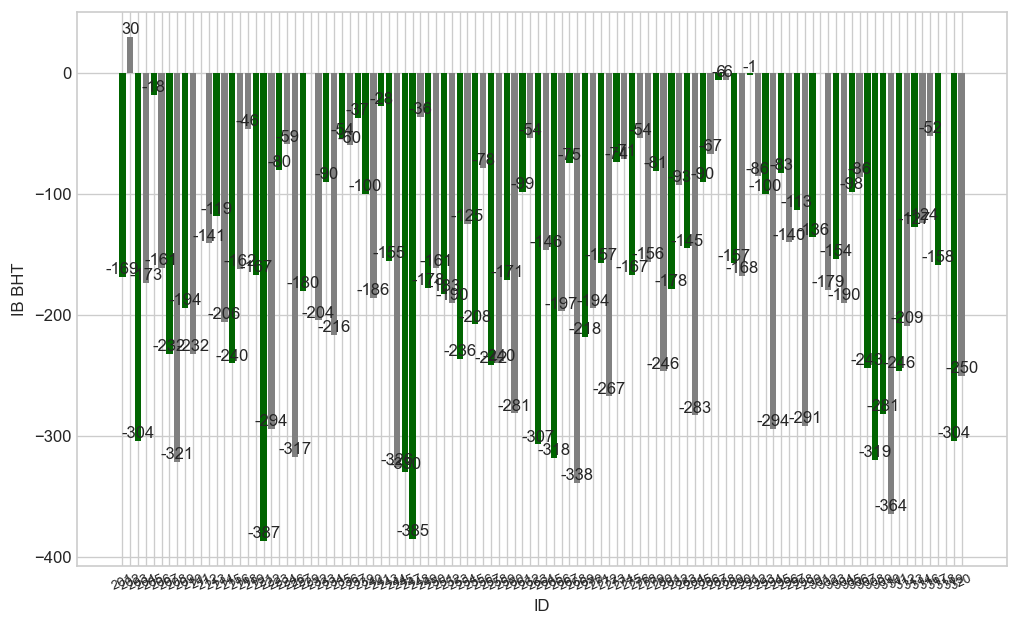

In [106]:
df = b3.groupby(['id','condition'])['ib'].describe()
df.reset_index(inplace=True)

# Extracting the 'vsr' values and their respective indices
ib_values = df['mean'] * 1000
indices = df.index
ids = df['id'].unique()

# Grouping colors based on 'condition' column
colors = ['grey' if condition == 0 else 'darkgreen' for condition in df['condition']]

# Create a dictionary to map conditions to unique colors
unique_conditions = df['condition'].unique()
color_dict = {0: 'grey', 1: 'darkgreen'}

# Plotting as a bar plot with color grouping
plt.figure(figsize=(10, 6))  # Adjust the width and height of the figure
bars = plt.bar(range(len(ib_values)), ib_values, color=colors, label='Condition')  # Add label for legend
plt.xlabel('ID')
plt.ylabel('IB BHT')
plt.xticks(range(len(ib_values)), ids, rotation=25, fontsize=8)  # Set x-axis ticks to match indices

# Adding text annotations for each bar
for bar, v in zip(bars, ib_values):
    plt.text(bar.get_x() + bar.get_width() / 2, v, f'{v:.0f}', ha='center', va='bottom')

# Creating a legend based on unique conditions
# legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
#                               label=f'Condition {condition}', markerfacecolor=color_dict[condition], markersize=10) for condition in unique_conditions]

legend_elements = [
    Line2D([0], [0], color='grey', lw=4, label='No control'),
    Line2D([0], [0], color='darkgreen', lw=4, label='Full control')
]

# plt.legend(handles=legend_elements)
plt.legend(handles=legend_elements, edgecolor='darkgrey', framealpha=1, frameon=True, loc = 'lower left')

plt.show()

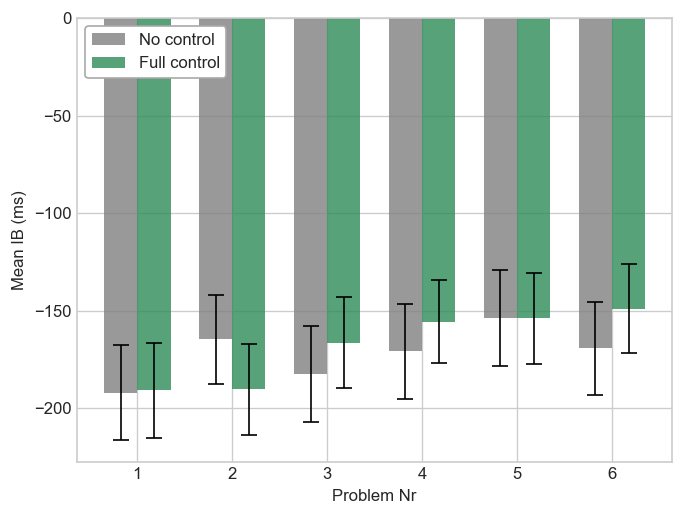

In [108]:
rib = b3.groupby(['condition', 'problem_nr'])['ib'].agg(['mean','std','sem'])
rib.reset_index(inplace=True)
rib

grouped = rib.copy()
grouped[['mean', 'std', 'sem']] *= 1000
# grouped[['mean', 'std', 'sem']] = grouped[['mean', 'std', 'sem']].round(decimals=1)
grouped = grouped.apply(lambda x: x.round(1) if x.name in ['mean', 'std', 'sem'] else x)

df = grouped

# Get unique conditions
conditions = df['condition'].unique()

fig, ax = plt.subplots()

bar_width = 0.35  # Width of the bars
index = df['condition'].unique()  # Index for the x-axis

# Modify condition names and colors
conditions_names = {0: 'No control', 1: 'Full control'}
conditions_colors = {0: 'gray', 1: 'seagreen'}

# Plotting loop
for i, condition in enumerate(conditions):
    condition_data = df[df['condition'] == condition]
    x_values = np.arange(len(condition_data['problem_nr'])) + i * bar_width
    y = condition_data['mean']
    ax.bar(x_values, y, width=bar_width, label=conditions_names[condition], alpha=0.8, color=conditions_colors[condition])
    ax.errorbar(x_values, y, yerr=condition_data['sem'] * 2, fmt='none', ecolor='black', capsize=5, lw = 1)

# Adding labels and title
ax.set_xlabel('Problem Nr')
ax.set_ylabel('Mean IB (ms)')
ax.set_xticks(np.arange(len(df['problem_nr'].unique())) + bar_width / 2)
ax.set_xticklabels(df['problem_nr'].unique())
ax.legend(edgecolor='darkgrey', framealpha=1, frameon=True, loc = 'upper left')

plt.show()

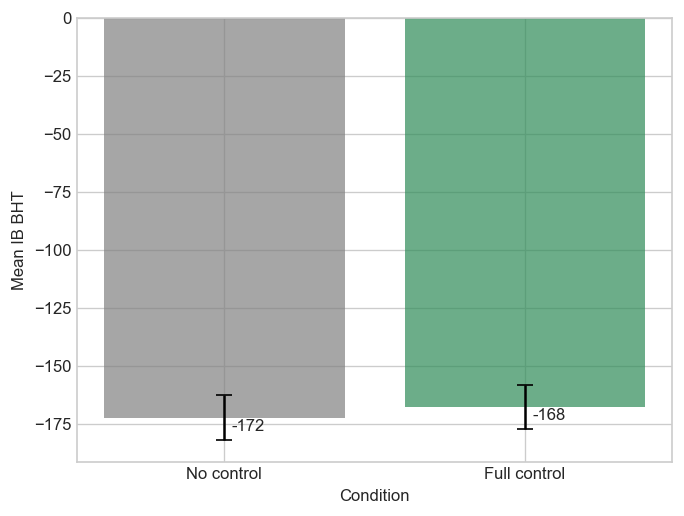

In [107]:
rib = b3.groupby(['condition'])['ib'].agg(['mean','std','sem'])
rib.reset_index(inplace=True)
rib

grouped = rib.copy()
grouped[['mean', 'std', 'sem']] *= 1000
grouped = grouped.apply(lambda x: x.round(1) if x.name in ['mean', 'std', 'sem'] else x)

df = grouped

# Get unique conditions
conditions = df['condition'].unique()

# Plotting the data with error bars
plt.bar(grouped.index, grouped['mean'], alpha=0.7, color = ['grey','seagreen']) # can use yerr=grouped['std'] to have SD error bars
plt.errorbar(grouped.index, grouped['mean'], yerr=2 * grouped['sem'], fmt='none', ecolor = 'black', capsize=5)

plt.xlabel('Condition')
plt.ylabel('Mean IB BHT')
plt.xticks(grouped.index, ['No control', 'Full control'])  # Set x-axis ticks to match 'condition' values
plt.grid(True)

# Scatter plot of individual observations behind the bars with reduced alpha
# for i, condition in enumerate(df['condition']):
    # plt.scatter(grouped.index[condition] + np.random.normal(0, 0.03), df['mean'][i], color='grey', alpha=0.5)

# Adding text labels for mean rt values at each point
for i, mean_vsr in enumerate(grouped['mean']):
    plt.text(grouped.index[i] + 0.08, mean_vsr - 7, f'{mean_vsr:.0f}', ha='center', va='bottom')

plt.show()

Combined plot

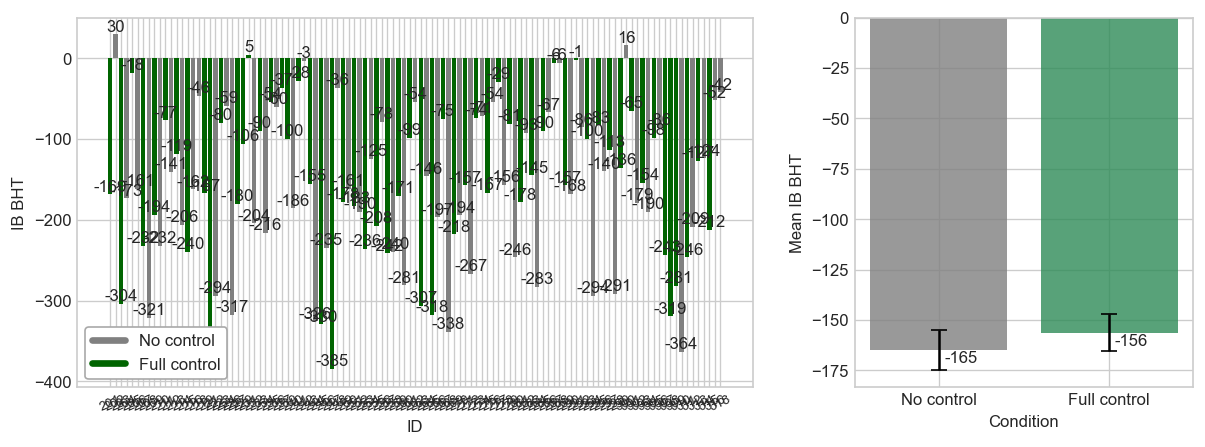

In [ ]:
df = b3.groupby(['id','condition'])['ib'].describe()
df.reset_index(inplace=True)

# Extracting the 'vsr' values and their respective indices
ib_values = df['mean'] * 1000
indices = df.index
ids = df['id'].unique()

# Grouping colors based on 'condition' column
colors = ['grey' if condition == 0 else 'darkgreen' for condition in df['condition']]

# Create a dictionary to map conditions to unique colors
unique_conditions = df['condition'].unique()
color_dict = {0: 'grey', 1: 'darkgreen'}

fig, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [2,1]})  # 1 row, 2 columns


# Plotting as a bar plot with color grouping
bars = axs[0].bar(range(len(ib_values)), ib_values, color=colors, label='Condition')  # Add label for legend
axs[0].set_xlabel('ID')
axs[0].set_ylabel('IB BHT')
axs[0].set_xticks(range(len(ib_values)), ids, rotation=25, fontsize=8)  # Set x-axis ticks to match indices

# Adding text annotations for each bar
for bar, v in zip(bars, ib_values):
    axs[0].text(bar.get_x() + bar.get_width() / 2, v, f'{v:.0f}', ha='center', va='bottom')

legend_elements = [
    Line2D([0], [0], color='grey', lw=4, label='No control'),
    Line2D([0], [0], color='darkgreen', lw=4, label='Full control')
]

axs[0].legend(handles=legend_elements, edgecolor='darkgrey', framealpha=1, frameon=True, loc = 'lower left')

#2
rib = b3.groupby(['condition'])['ib'].agg(['mean','std','sem'])
rib.reset_index(inplace=True)
rib

grouped = rib.copy()
grouped[['mean', 'std', 'sem']] *= 1000
grouped = grouped.apply(lambda x: x.round(1) if x.name in ['mean', 'std', 'sem'] else x)

df = grouped

# Get unique conditions
conditions = df['condition'].unique()

# Plotting the data with error bars
axs[1].bar(grouped.index, grouped['mean'], alpha=0.8, color = ['grey','seagreen']) # can use yerr=grouped['std'] to have SD error bars
axs[1].errorbar(grouped.index, grouped['mean'], yerr=2 * grouped['sem'], fmt='none', ecolor = 'black', capsize=5)

axs[1].set_xlabel('Condition')
axs[1].set_ylabel('Mean IB BHT')
axs[1].set_xticks(grouped.index, ['No control', 'Full control'])  # Set x-axis ticks to match 'condition' values
axs[1].grid(True)

# Adding text labels for mean rt values at each point
for i, mean_vsr in enumerate(grouped['mean']):
    axs[1].text(grouped.index[i] + 0.13, mean_vsr - 8, f'{mean_vsr:.0f}', ha='center', va='bottom')

plt.show()

## Explicit measures

Explicit sense of control

In [48]:
e1c.rename(columns=lambda x: x.replace('_rating', '') if '_rating' in x else x, inplace=True)
e1c

e2 = e1c[['id','condition','ratings','agef1']].copy()
e2 = e2[e2['ratings'] == 'bht'] # equivalent e2.query("ratings == 'bht'")
e2.rename(columns={'participant':'id'}, inplace=True)

# # e2 = e2[~((e2['condition'] == 0) & (e2['agef1'] == 7))] # Removing observations where 'condition' is 0 and 'agef1' is 7
# # e2 = e2[~((e2['condition'] == 1) & (e2['agef1'] == 0))] # Removing observations where 'condition' is 1 and 'agef1' is 0


e2.reset_index(inplace=True,drop=True)
e2


C:\Users\Bartek\AppData\Local\Temp\ipykernel_33624\1867825151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e1c.rename(columns=lambda x: x.replace('_rating', '') if '_rating' in x else x, inplace=True)


,id,condition,ratings,agef1
0,201,1,bht,6
1,202,0,bht,2
2,203,1,bht,4
3,204,0,bht,2
4,205,1,bht,2
...,...,...,...,...
103,316,0,bht,3
104,317,1,bht,3
105,318,0,bht,1
106,319,1,bht,5


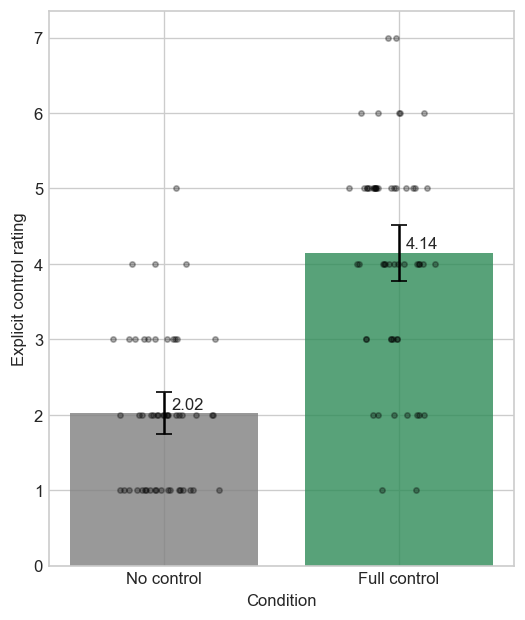

In [116]:
plt.figure(figsize=(5, 6))  # Adjust the width and height of the figure

grouped = e2.groupby(['condition'])['agef1'].agg(['mean','std','sem'])
grouped.reset_index(inplace=True)

plt.bar(grouped.index, grouped['mean'], alpha=0.8, color = ['grey','seagreen']) # can use yerr=grouped['std'] to have SD error bars
plt.errorbar(grouped.index, grouped['mean'], yerr=2 * grouped['sem'], fmt='none', ecolor = 'black', capsize=5)

plt.xlabel('Condition')
plt.ylabel('Explicit control rating')
plt.xticks(grouped.index, ['No control', 'Full control'])  # Set x-axis ticks to match 'condition' values

# Scatter plot of individual observations behind the bars with reduced alpha
for i, condition in enumerate(e2['condition']):
    plt.scatter(grouped.index[condition] + np.random.normal(0, 0.1), e2['agef1'][i], color='black', alpha=0.3, s=10)

    # Adding text labels for mean vsr values at each point
for i, mean in enumerate(grouped['mean']):
    plt.text(grouped.index[i] + 0.1, mean + 0.02, f'{mean:.2f}', ha='center', va='bottom')


plt.show()

NASA

In [49]:
n1 = e1c[['id','condition','ratings','nasa1','nasa2','nasa3','nasa4']].copy()
n1['nasa'] = n1[['nasa1', 'nasa2', 'nasa3', 'nasa4']].mean(axis=1)

n1

,id,condition,ratings,nasa1,nasa2,nasa3,nasa4,nasa
0,201,1,bht,4,3,2,5,3.5
1,201,1,vts,6,6,2,5,4.75
2,202,0,bht,5,2,6,5,4.5
3,202,0,vts,2,4,3,4,3.25
4,203,1,bht,3,2,3,4,3
...,...,...,...,...,...,...,...,...
223,318,0,vts,4,2,4,4,3.5
224,319,1,bht,2,2,4,3,2.75
225,319,1,vts,3,5,4,3,3.75
226,320,0,bht,6,5,6,6,5.75


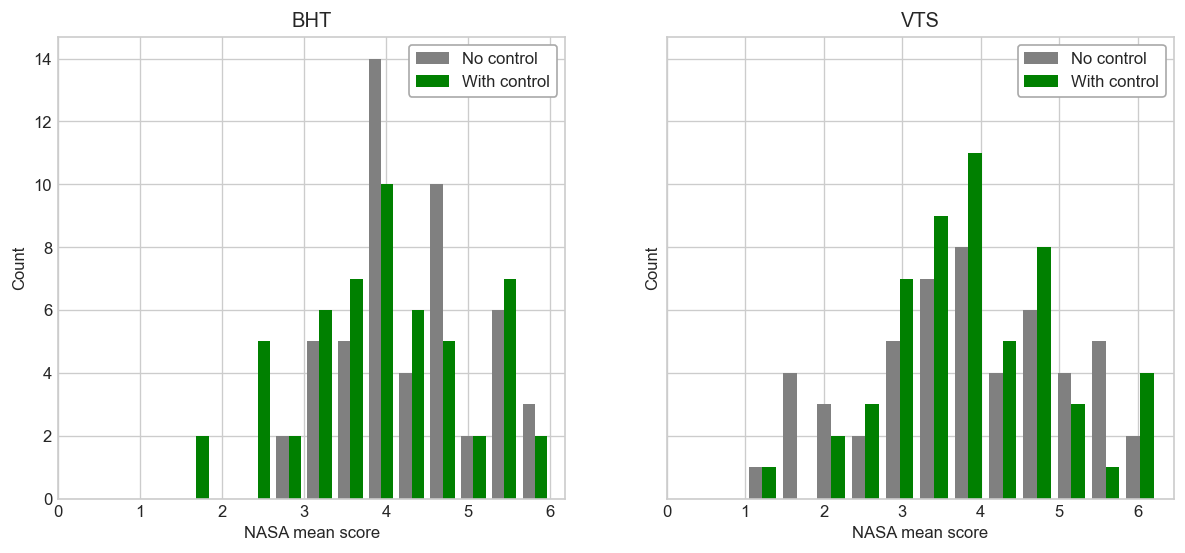

In [32]:
import matplotlib.pyplot as plt
df=n1

# Assuming df is your DataFrame
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Histogram for 'bht' rating
condition_0_data = df[(df['ratings'] == 'bht') & (df['condition'] == 0)]['nasa']
condition_1_data = df[(df['ratings'] == 'bht') & (df['condition'] == 1)]['nasa']
ax1.hist([condition_0_data, condition_1_data], bins=12, color=['grey', 'green'], label=['No control', 'With control'])
ax1.set_xlabel('NASA mean score')
ax1.set_ylabel('Count')
ax1.set_xticks(range(0, 7, 1))
ax1.legend(edgecolor='darkgrey', framealpha=1, frameon=True)
ax1.set_title('BHT')

# Histogram for 'vts' rating
condition_0_data = df[(df['ratings'] == 'vts') & (df['condition'] == 0)]['nasa']
condition_1_data = df[(df['ratings'] == 'vts') & (df['condition'] == 1)]['nasa']
ax2.hist([condition_0_data, condition_1_data], bins=12, color=['grey', 'green'], label=['No control', 'With control'])
ax2.set_xlabel('NASA mean score')
ax2.set_ylabel('Count')
ax2.set_xticks(range(0, 7, 1))
ax2.legend(edgecolor='darkgrey', framealpha=1, frameon=True)
ax2.set_title('VTS')

plt.show()


VTS explicit

In [115]:


e1c.rename(columns=lambda x: x.replace('_rating', '') if '_rating' in x else x, inplace=True)
e1c

ev2 = e1c[['id','condition','ratings','agef1','agef2','agef3','agef4']].copy()
ev2 = ev2[ev2['ratings'] == 'vts'] 
ev2.rename(columns={'participant':'id'}, inplace=True)

# # e2 = e2[~((e2['condition'] == 0) & (e2['agef1'] == 7))] # Removing observations where 'condition' is 0 and 'agef1' is 7
# # e2 = e2[~((e2['condition'] == 1) & (e2['agef1'] == 0))] # Removing observations where 'condition' is 1 and 'agef1' is 0

# grouped = ev2.groupby(['condition'])['agef1'].agg(['mean','std','sem'])
# grouped.reset_index(inplace=True)

ev2.reset_index(inplace=True,drop=True)
ev2

nv1 = n1[n1['ratings'] == 'vts']
nv1

ev3 = ev2.merge(nv1)
ev3

ev3.to_csv('ev3.csv')

C:\Users\Bartek\AppData\Local\Temp\ipykernel_33624\4005221481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e1c.rename(columns=lambda x: x.replace('_rating', '') if '_rating' in x else x, inplace=True)


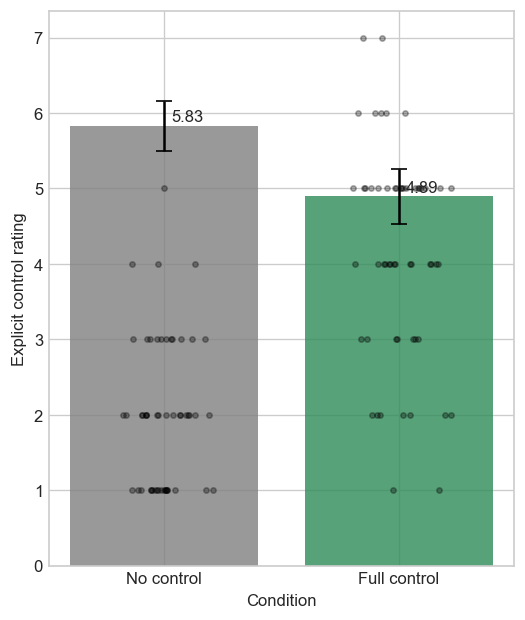

In [117]:
plt.figure(figsize=(5, 6))  # Adjust the width and height of the figure

grouped = ev2.groupby(['condition'])['agef1'].agg(['mean','std','sem'])
grouped.reset_index(inplace=True)

plt.bar(grouped.index, grouped['mean'], alpha=0.8, color = ['grey','seagreen']) # can use yerr=grouped['std'] to have SD error bars
plt.errorbar(grouped.index, grouped['mean'], yerr=2 * grouped['sem'], fmt='none', ecolor = 'black', capsize=5)

plt.xlabel('Condition')
plt.ylabel('Explicit control rating')
plt.xticks(grouped.index, ['No control', 'Full control'])  # Set x-axis ticks to match 'condition' values

# Scatter plot of individual observations behind the bars with reduced alpha
for i, condition in enumerate(e2['condition']):
    plt.scatter(grouped.index[condition] + np.random.normal(0, 0.1), e2['agef1'][i], color='black', alpha=0.3, s=10)

    # Adding text labels for mean vsr values at each point
for i, mean in enumerate(grouped['mean']):
    plt.text(grouped.index[i] + 0.1, mean + 0.02, f'{mean:.2f}', ha='center', va='bottom')


plt.show()

Explicit vs IB

In [50]:
e2

ei1 = d5.groupby(['id','condition'])['ib'].agg(['mean'])
ei1.reset_index(inplace=True)
ei1

e3 = pd.merge(e2, ei1, on = ['id','condition'], how='left')
e3.rename(columns={'mean':'ib'}, inplace=True)
e3

,id,condition,ratings,agef1,ib
0,201,1,bht,6,-0.18922
1,202,0,bht,2,-0.08429
2,203,1,bht,4,-0.18308
3,204,0,bht,2,-0.14783
4,205,1,bht,2,-0.09431
...,...,...,...,...,...
103,316,0,bht,3,-0.08879
104,317,1,bht,3,-0.12392
105,318,0,bht,1,-0.14098
106,319,1,bht,5,-0.10379


c:\Users\Bartek\miniforge3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
c:\Users\Bartek\miniforge3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


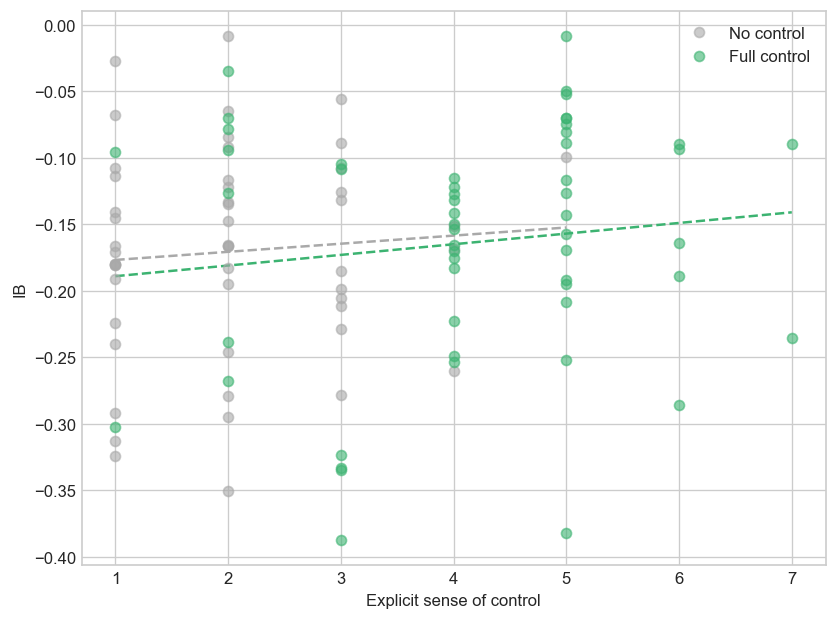

In [79]:
from sklearn.linear_model import Ridge

e3 = e3.dropna(subset=['ib'])

# Define colors and conditions
conditions_names = {0: 'No control', 1: 'Full control'}
conditions_colors = {0: 'darkgrey', 1: 'mediumseagreen'}

# Scatter plot with error bars
plt.figure(figsize=(8, 6))

for condition, color in conditions_colors.items():
    condition_data = e3[e3['condition'] == condition]

    # Fit Ridge regression model
    ridge = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed
    ridge.fit(condition_data[['agef1']], condition_data['ib'])

    # Plot scatter points
    plt.errorbar(
        condition_data['agef1'],
        condition_data['ib'],
        fmt='o',
        color=color,
        capsize=3,
        alpha=0.6,
        lw=1,
        label=conditions_names[condition]
    )

    # Plot regression line
    x_range = np.linspace(condition_data['agef1'].min(), condition_data['agef1'].max(), 100)
    plt.plot(x_range, ridge.predict(x_range.reshape(-1, 1)), color=color, linestyle='--')

plt.xlabel('Explicit sense of control')
plt.ylabel('IB')
plt.legend()
plt.show()


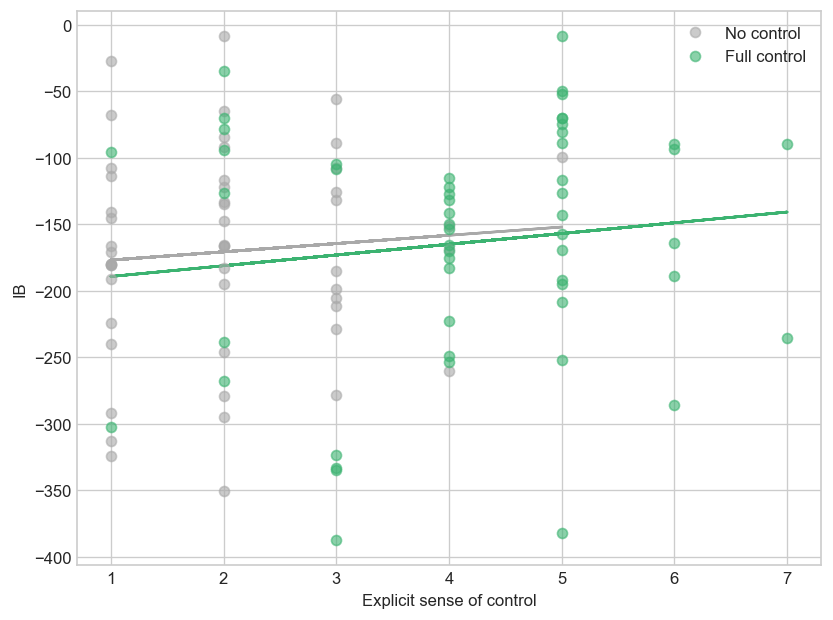

In [80]:
# Define colors and conditions
conditions_names = {0: 'No control', 1: 'Full control'}
conditions_colors = {0: 'darkgrey', 1: 'mediumseagreen'}

# Scatter plot with error bars
plt.figure(figsize=(8, 6))

for condition, color in conditions_colors.items():
    condition_data = e3[e3['condition'] == condition]
    plt.errorbar(
        condition_data['agef1'],
        condition_data['ib'] * 1000,
        fmt='o',
        color=color,
        capsize=3, alpha=0.6, lw=1,
        label=conditions_names[condition]
    )

    # Calculate the coefficients (slope and intercept) of the regression line
    coeffs = np.polyfit(condition_data['agef1'], condition_data['ib'] * 1000, 1)
    slope = coeffs[0]
    intercept = coeffs[1]

    # Plot the regression line
    plt.plot(condition_data['agef1'], slope * condition_data['agef1'] + intercept, color=color)

plt.xlabel('Explicit sense of control')
plt.ylabel('IB')
plt.legend()
plt.show()

Correlations

In [51]:
ec1 = e1c.copy()
ec1['nasa'] = ec1[['nasa1','nasa2','nasa3','nasa4']].mean(axis=1)
ec1

,id,condition,cb,ratings,agef1,agef2,agef3,agef4,agef1_rt,agef2_rt,...,agef4_rt,nasa1,nasa2,nasa3,nasa4,nasa1_rt,nasa2_rt,nasa3_rt,nasa4_rt,nasa
0,201,1,1,bht,6,4,5,5,12.433,14.957,...,34.329,4,3,2,5,5.616,10.04,20.832,29.517,3.5
1,201,1,1,vts,5,4,5,5,13.294,23.935,...,29.248,6,6,2,5,3.592,5.585,8.301,10.976,4.75
2,202,0,2,bht,2,1,6,6,6.764,11.303,...,27.836,5,2,6,5,7.13,11.356,15.563,24.261,4.5
3,202,0,2,vts,7,5,3,3,6.208,14.259,...,24.494,2,4,3,4,9.745,14.236,17.564,22.077,3.25
4,203,1,2,bht,4,4,3,4,5.212,17.731,...,30.173,3,2,3,4,7.167,12.118,21.852,28.039,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,318,0,2,vts,5,6,4,4,6.682,13.782,...,19.658,4,2,4,4,5.116,6.423,9.479,13.614,3.5
224,319,1,2,bht,5,4,3,3,4.744,13.256,...,20.741,2,2,4,3,4.043,6.434,10.282,15.216,2.75
225,319,1,2,vts,5,6,2,2,6.55,14.177,...,19.569,3,5,4,3,2.692,5.361,7.442,10.797,3.75
226,320,0,1,bht,1,1,6,7,10.624,18.126,...,26.516,6,5,6,6,4.475,9.192,13.565,18.271,5.75


In [61]:
# ec1.merge(bg2[bg2['bht_final_correct'] == 1])

bg2m = bg2[bg2['bht_final_correct'] == 1].copy()
bg2m.drop(columns=['condition','bht_final_correct'], inplace=True)
bg2m.rename(columns={'proportion' : 'BHT_acc', 'participant':'id'}, inplace=True)
bg2m

ec2 = ec1[ec1['ratings'] == 'bht'].copy()
ec3 = ec2.merge(bg2m)
ec3 = ec3.merge(rd3)

ec3.rename(columns={'agef1' : 'sense_of_control'}, inplace=True)
ec3



,id,condition,cb,ratings,sense_of_control,agef2,agef3,agef4,agef1_rt,agef2_rt,...,nasa2,nasa3,nasa4,nasa1_rt,nasa2_rt,nasa3_rt,nasa4_rt,nasa,BHT_acc,vsr
0,201,1,1,bht,6,4,5,5,12.433,14.957,...,3,2,5,5.616,10.04,20.832,29.517,3.5,1,0.5102
1,203,1,2,bht,4,4,3,4,5.212,17.731,...,2,3,4,7.167,12.118,21.852,28.039,3,0.66667,0.51872
2,205,1,1,bht,2,2,4,4,6.136,9.974,...,1,1,3,3.534,5.249,7.667,14.333,1.75,1,0.625
3,207,1,2,bht,5,4,5,4,3.191,7.546,...,2,5,4,5.59,6.545,8.949,11.018,3.75,0.83333,0.40957
4,209,1,1,bht,5,5,4,4,5.796,10.407,...,2,3,3,5.094,8.028,15.022,20.077,3,0.33333,0.52239
5,211,1,2,bht,1,1,4,5,6.932,11.262,...,1,1,4,6.459,8.979,11.933,21.468,2.75,0,0.23214
6,213,1,1,bht,4,4,5,5,6.17,11.74,...,3,7,5,11.186,16.211,20.1,24.322,5,0.83333,0.31746
7,215,1,2,bht,2,1,4,5,7.769,14.728,...,2,6,5,7.16,13.812,19.812,26.514,4.25,0,0.58639
8,219,1,2,bht,7,6,5,5,3.496,8.437,...,5,1,2,6.768,11.181,12.804,24.032,3.25,0.83333,0.5
9,221,1,1,bht,3,4,6,6,4.746,15.295,...,2,7,6,3.111,6.193,10.442,14.441,5.25,0.66667,0.52632


In [62]:
correlation_matrix = ec3[['sense_of_control', 'BHT_acc', 'nasa', 'vsr']].corr()
correlation_matrix

,sense_of_control,BHT_acc,nasa,vsr
sense_of_control,1,0.54137,-0.06589,0.36224
BHT_acc,0.54137,1,0.04342,0.39748
nasa,-0.06589,0.04342,1,-0.11786
vsr,0.36224,0.39748,-0.11786,1


In [63]:
from scipy.stats import pearsonr
import numpy as np
df = ec3[['sense_of_control', 'BHT_acc', 'nasa', 'vsr']]
rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
rho.round(2).astype(str) + p

C:\Users\Bartek\AppData\Local\Temp\ipykernel_33624\2476006642.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))


,sense_of_control,BHT_acc,nasa,vsr
sense_of_control,1.0***,0.54***,-0.07,0.36**
BHT_acc,0.54***,1.0***,0.04,0.4**
nasa,-0.07,0.04,1.0***,-0.12
vsr,0.36**,0.4**,-0.12,1.0***


## BHT

#### Accuracy

In [56]:
bp2 = bp1c[~bp1c['training_bht'].isin([1])] # remove training
bp2

,participant,condition,cb,date,training_bht,problem_nr,bht_estimation,bht_rt,bht_start,bht_final_correct
3,201,1,1,2024-01-09_10h04.12.340,0,1,6,2.603,5,1
4,201,1,1,2024-01-09_10h04.12.340,0,2,1,4.087,8,1
5,201,1,1,2024-01-09_10h04.12.340,0,3,7,3.404,7,1
6,201,1,1,2024-01-09_10h04.12.340,0,4,10,4.587,5,1
7,201,1,1,2024-01-09_10h04.12.340,0,5,3,3.754,6,1
...,...,...,...,...,...,...,...,...,...,...
938,320,0,1,2024-02-09_12h03.27.154,0,2,3,3.588,5,-1
939,320,0,1,2024-02-09_12h03.27.154,0,3,5,4.503,8,-1
940,320,0,1,2024-02-09_12h03.27.154,0,4,5,2.687,7,-1
941,320,0,1,2024-02-09_12h03.27.154,0,5,4,4.27,5,-1


In [57]:
bg = bp2.groupby(['participant','condition'])['bht_final_correct'].value_counts(normalize=True)
bg = pd.DataFrame(bg)
bg.rename(columns={'bht_final_correct':'corr'}, inplace=True)

bg.reset_index(inplace=True)
# bg = bg[~bg['condition'].isin([0])]
bg = bg[~bg['bht_final_correct'].isin([-1])]
# bg.reset_index(inplace=True, drop=True)
bg

,participant,condition,bht_final_correct,proportion
0,201,1,1,1
2,203,1,1,0.66667
3,203,1,0,0.33333
5,205,1,1,1
7,207,1,1,0.83333
...,...,...,...,...
141,313,1,0,0.66667
142,313,1,1,0.33333
145,317,1,1,1
147,319,1,1,0.5


In [58]:
# Assuming bg is your DataFrame
bg2 = pd.DataFrame()

# List of unique values for each column
participants = bg['participant'].unique()
conditions = bg['condition'].unique()
bht_final_correct_values = bg['bht_final_correct'].unique()

# Creating a DataFrame with all combinations
complete_combinations = pd.DataFrame([(participant, condition, bht_final_correct)
                                      for participant in participants
                                      for condition in conditions
                                      for bht_final_correct in bht_final_correct_values],
                                     columns=['participant', 'condition', 'bht_final_correct'])
bg2 = pd.merge(bg, complete_combinations, how='right', on=['participant', 'condition', 'bht_final_correct']) # Merging with the original df to fill missing values
bg2 = bg2.fillna({'proportion': 0}) # Filling NaN values with desired fill values if needed

bg2


,participant,condition,bht_final_correct,proportion
0,201,1,1,1
1,201,1,0,0
2,203,1,1,0.66667
3,203,1,0,0.33333
4,205,1,1,1
...,...,...,...,...
107,313,1,0,0.66667
108,317,1,1,1
109,317,1,0,0
110,319,1,1,0.5


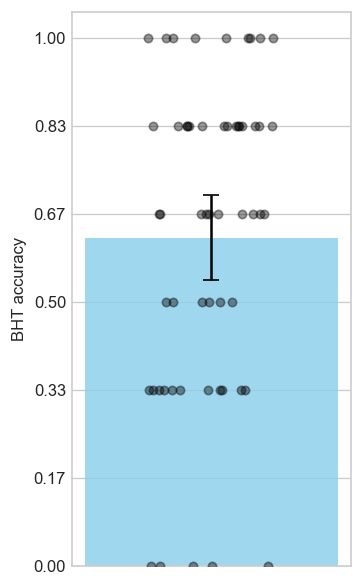

In [109]:
df = bg2[bg2['bht_final_correct'] == 1]

# Calculate mean and standard error (SE) for each condition
mean_corr = df.groupby('condition')['proportion'].mean()
se_corr = df.groupby('condition')['proportion'].sem() * 2  # multiplied by 2 to get 2 SEs

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(3, 6))

# Create the bar plot with narrower bars
ax.bar(mean_corr.index, mean_corr.values, yerr=se_corr.values, capsize=5, color='skyblue', width=0.4, alpha=.8)

# Add scattered dots
for condition, group in df.groupby('condition'):
    x_vals = np.full_like(group['proportion'], condition, dtype=np.float64)
    jitter = np.random.uniform(low=-0.1, high=0.1, size=len(group['proportion']))
    x_vals += jitter
    ax.scatter(x_vals, group['proportion'], color='black', s=25, label=None, zorder=10, alpha=.4)

# Set y-axis ticks and labels
y_ticks = np.linspace(0, 1, 7)
ax.set_yticks(y_ticks)
ax.set_yticklabels([f'{tick:.2f}' for tick in y_ticks])

# Remove ticks and labels from the x-axis
ax.set_xticks([])

# Set labels and title
ax.set_ylabel('BHT accuracy')

# Show the plot
plt.show()

## BHT acc, VSR, SoA

In [64]:
bg3 = bg2[bg2['bht_final_correct'] == 1].copy()
bg3 = bg3[bg3['proportion'] == 0]
bg3

,participant,condition,bht_final_correct,proportion
10,211,1,1,0
14,215,1,1,0
28,235,1,1,0
30,237,1,1,0
104,311,1,1,0


In [65]:
bm1 = bg2[bg2['bht_final_correct'] == 1].copy()
bm1.rename(columns={'participant':'id', 'proportion':'BHT_acc'}, inplace=True)
bm2 = bm1.merge(rd3, how='left')
bm2.drop(columns=['bht_final_correct','condition'], inplace=True)

bm2

,id,BHT_acc,vsr
0,201,1,0.5102
1,203,0.66667,0.51872
2,205,1,0.625
3,207,0.83333,0.40957
4,209,0.33333,0.52239
5,211,0,0.23214
6,213,0.83333,0.31746
7,215,0,0.58639
8,219,0.83333,0.5
9,221,0.66667,0.52632


In [67]:
e3 = e2.copy()
e3.drop(columns=['ratings','condition'], inplace=True)

bm3 = bm2.merge(e3, how='left')
bm3.rename(columns={'agef1':'sense_of_control'}, inplace=True)

In [68]:
bm3[bm3['BHT_acc'] < 0.2]

,id,BHT_acc,vsr,sense_of_control
5,211,0,0.23214,1
7,215,0,0.58639,2
14,235,0,0.00526,2
15,237,0,0.22222,2
52,311,0,0.00476,2


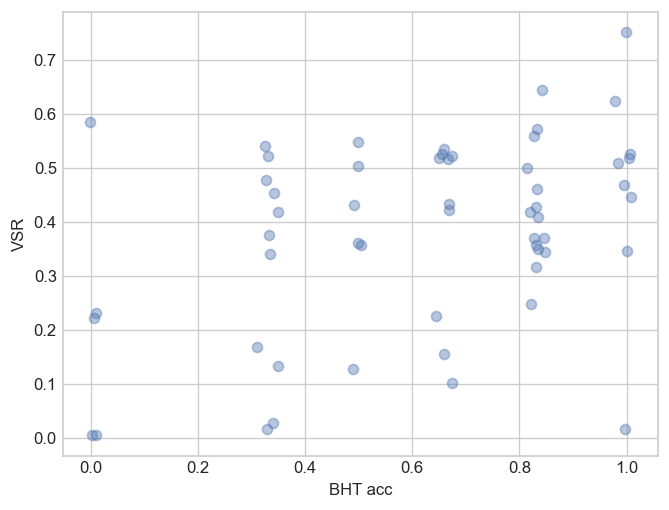

In [69]:
def jitter(arr, factor=0.01):
    return arr + np.random.normal(0, factor, size=len(arr))

plt.scatter(jitter(bm2['BHT_acc']), bm2['vsr'], alpha=0.4)
plt.xlabel('BHT acc')
plt.ylabel('VSR')
plt.show()

# Modelling

Prepare final dataset

In [ ]:
d5 # to add: NASA, sense of control, BHT acc
bg2m # BHT acc
ec2[['id','nasa','agef1','agef2','agef3','agef4']] # SoA, NASA

In [79]:
d6 = d5.merge(bg2m, how='outer')
d6 = d6.merge(ec2[['id','nasa','agef1','agef2','agef3','agef4']] )
d6

,id,sex,age,condition,cb,frame_rate,training_vts,enable_ib,trial_time,trial_nr,...,ib_rt,ib_start,switch,ib,BHT_acc,nasa,agef1,agef2,agef3,agef4
0,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h35.58.262,0,...,5.29,6,NaN,-0.2,1,3.5,6,4,5,5
1,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.08.011,1,...,2.27,3,0,-0.3,1,3.5,6,4,5,5
2,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.14.596,2,...,3.81,2,0,-0.8,1,3.5,6,4,5,5
3,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.23.138,3,...,2.94,8,0,-0.1,1,3.5,6,4,5,5
4,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.30.678,4,...,1.96,3,1,-0.5,1,3.5,6,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21479,318,Kobieta,26,0,2,59.99,0,1,2024-02-02_15h45.25.876,67,...,1.12,7,0,0.4,NaN,3.5,1,1,5,3
21480,318,Kobieta,26,0,2,59.99,0,1,2024-02-02_15h45.31.371,68,...,1.72,6,0,-0.1,NaN,3.5,1,1,5,3
21481,318,Kobieta,26,0,2,59.99,0,1,2024-02-02_15h45.37.465,69,...,1.95,6,0,-0.5,NaN,3.5,1,1,5,3
21482,318,Kobieta,26,0,2,59.99,0,1,2024-02-02_15h45.43.947,70,...,0.68,2,0,-0.4,NaN,3.5,1,1,5,3


Cleaning trials (IB and RT)

In [160]:
# Calculate mean and standard deviation for each ID
d6['rt_mean'] = d6.groupby('id')['rt'].transform('mean')
d6['rt_std'] = d6.groupby('id')['rt'].transform('std')
d6['ib_mean'] = d6.groupby('id')['ib'].transform('mean')
d6['ib_std'] = d6.groupby('id')['ib'].transform('std')
d6

# Fill with NaN
outliers_rt = (d6['rt'] < d6['rt_mean'] - 3 * d6['rt_std']) | (d6['rt'] > d6['rt_mean'] + 3 * d6['rt_std'])
d6.loc[outliers_rt, 'rt'] = float('nan')
outliers_ib = (d6['ib'] < d6['ib_mean'] - 3 * d6['ib_std']) | (d6['ib'] > d6['ib_mean'] + 3 * d6['ib_std'])
d6.loc[outliers_ib, 'ib'] = float('nan')

# Clean IB data due to high correlation between start and report point
d6.loc[d6['id'].isin(out_ib), 'ib'] = np.nan # replace with nans

d6 

,id,sex,age,condition,cb,frame_rate,training_vts,enable_ib,trial_time,trial_nr,...,BHT_acc,nasa,agef1,agef2,agef3,agef4,rt_mean,rt_std,ib_mean,ib_std
0,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h35.58.262,0,...,1,3.5,6,4,5,5,1.9425,0.24795,-0.18922,0.2698
1,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.08.011,1,...,1,3.5,6,4,5,5,1.9425,0.24795,-0.18922,0.2698
2,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.14.596,2,...,1,3.5,6,4,5,5,1.9425,0.24795,-0.18922,0.2698
3,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.23.138,3,...,1,3.5,6,4,5,5,1.9425,0.24795,-0.18922,0.2698
4,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.30.678,4,...,1,3.5,6,4,5,5,1.9425,0.24795,-0.18922,0.2698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21479,318,Kobieta,26,0,2,59.99,0,1,2024-02-02_15h45.25.876,67,...,NaN,3.5,1,1,5,3,2.12627,0.24812,-0.14098,0.29552
21480,318,Kobieta,26,0,2,59.99,0,1,2024-02-02_15h45.31.371,68,...,NaN,3.5,1,1,5,3,2.12627,0.24812,-0.14098,0.29552
21481,318,Kobieta,26,0,2,59.99,0,1,2024-02-02_15h45.37.465,69,...,NaN,3.5,1,1,5,3,2.12627,0.24812,-0.14098,0.29552
21482,318,Kobieta,26,0,2,59.99,0,1,2024-02-02_15h45.43.947,70,...,NaN,3.5,1,1,5,3,2.12627,0.24812,-0.14098,0.29552


In [79]:
d6.to_csv('d6.csv')

,id,sex,age,condition,cb,frame_rate,training_vts,enable_ib,trial_time,trial_nr,...,BHT_acc,nasa,agef1,agef2,agef3,agef4,rt_mean,rt_std,ib_mean,ib_std
0,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h35.58.262,0,...,1,3.5,6,4,5,5,1.96456,0.29252,-0.18922,0.2698
1,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.08.011,1,...,1,3.5,6,4,5,5,1.96456,0.29252,-0.18922,0.2698
2,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.14.596,2,...,1,3.5,6,4,5,5,1.96456,0.29252,-0.18922,0.2698
3,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.23.138,3,...,1,3.5,6,4,5,5,1.96456,0.29252,-0.18922,0.2698
4,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.30.678,4,...,1,3.5,6,4,5,5,1.96456,0.29252,-0.18922,0.2698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22115,320,Kobieta,19,0,1,60.01,0,1,2024-02-09_12h51.43.055,67,...,NaN,5.75,1,1,6,7,2.05403,0.20378,-0.27546,0.17679
22116,320,Kobieta,19,0,1,60.01,0,1,2024-02-09_12h51.50.695,68,...,NaN,5.75,1,1,6,7,2.05403,0.20378,-0.27546,0.17679
22117,320,Kobieta,19,0,1,60.01,0,1,2024-02-09_12h51.56.781,69,...,NaN,5.75,1,1,6,7,2.05403,0.20378,-0.27546,0.17679
22118,320,Kobieta,19,0,1,60.01,0,1,2024-02-09_12h52.02.186,70,...,NaN,5.75,1,1,6,7,2.05403,0.20378,-0.27546,0.17679


In [91]:
# BHT

# Calculate mean and standard deviation for each ID
b3['rt_mean'] = b3.groupby('id')['rt'].transform('mean')
b3['rt_std'] = b3.groupby('id')['rt'].transform('std')
b3['ib_mean'] = b3.groupby('id')['ib'].transform('mean')
b3['ib_std'] = b3.groupby('id')['ib'].transform('std')
b3

# Fill with NaN
outliers_rt = (b3['rt'] < b3['rt_mean'] - 3 * b3['rt_std']) | (b3['rt'] > b3['rt_mean'] + 3 * b3['rt_std'])
b3.loc[outliers_rt, 'rt'] = float('nan')
outliers_ib = (b3['ib'] < b3['ib_mean'] - 3 * b3['ib_std']) | (b3['ib'] > b3['ib_mean'] + 3 * b3['ib_std'])
b3.loc[outliers_ib, 'ib'] = float('nan')

# Clean IB data due to high correlation between start and report point
b3.loc[b3['id'].isin(out_ib), 'ib'] = np.nan # replace with nans

b3 

,id,sex,age,condition,cb,frame_rate,training_bht,enable_ib,trial_time,trial_nr,...,fb_delay,fb_delay_index,ib_estimation,ib_rt,ib_start,ib,rt_mean,rt_std,ib_mean,ib_std
12,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h22.13.993,0,...,0.9,0,3,4.73,5,-0.6,3.242,0.52036,-0.16857,0.33342
13,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h22.23.537,1,...,0.6,1,8,999,6,0.2,3.242,0.52036,-0.16857,0.33342
14,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h22.35.839,2,...,0.9,2,2,4.12,3,-0.7,3.242,0.52036,-0.16857,0.33342
15,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h22.44.920,3,...,0.6,3,3,3.85,4,-0.3,3.242,0.52036,-0.16857,0.33342
16,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h22.53.520,4,...,0.9,4,6,3.59,3,-0.3,3.242,0.52036,-0.16857,0.33342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9239,320,Kobieta,19,0,1,60.01,0,1,2024-02-09_12h24.43.931,7,...,0.9,67,3,5.6,7,-0.6,3.41569,0.3525,-0.25,0.22329
9240,320,Kobieta,19,0,1,60.01,0,1,2024-02-09_12h24.54.567,8,...,0.6,68,3,3.28,6,-0.3,3.41569,0.3525,-0.25,0.22329
9241,320,Kobieta,19,0,1,60.01,0,1,2024-02-09_12h25.03.214,9,...,0.3,69,2,2.92,2,-0.1,3.41569,0.3525,-0.25,0.22329
9242,320,Kobieta,19,0,1,60.01,0,1,2024-02-09_12h25.10.765,10,...,0.3,70,3,3.32,8,0,3.41569,0.3525,-0.25,0.22329


In [92]:
b3.to_csv('b3.csv')

Load final dataset

In [ ]:
# load
filename = 'globalsave_12_02_24.pkl'
dill.load_session(filename)

Set & setting

In [2]:
# %pip install pymer4
%pip show pymer4


Name: pymer4
Version: 0.8.1
Summary: pymer4: all the convenience of lme4 in python
Home-page: http://eshinjolly.com/pymer4/
Author: Eshin Jolly
Author-email: eshin.jolly.GR@dartmouth.edu
License: MIT
Location: c:\users\bartek\miniforge3\lib\site-packages
Requires: joblib, matplotlib, numpy, pandas, patsy, rpy2, scikit-learn, scipy, seaborn
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [7]:
d6

,id,sex,age,condition,cb,frame_rate,training_vts,enable_ib,trial_time,trial_nr,...,BHT_acc,nasa,agef1,agef2,agef3,agef4,rt_mean,rt_std,ib_mean,ib_std
0,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h35.58.262,0,...,1,3.5,6,4,5,5,1.9425,0.24795,-0.18922,0.2698
1,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.08.011,1,...,1,3.5,6,4,5,5,1.9425,0.24795,-0.18922,0.2698
2,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.14.596,2,...,1,3.5,6,4,5,5,1.9425,0.24795,-0.18922,0.2698
3,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.23.138,3,...,1,3.5,6,4,5,5,1.9425,0.24795,-0.18922,0.2698
4,201,Kobieta,21,1,1,59.98,0,1,2024-01-09_10h36.30.678,4,...,1,3.5,6,4,5,5,1.9425,0.24795,-0.18922,0.2698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21479,318,Kobieta,26,0,2,59.99,0,1,2024-02-02_15h45.25.876,67,...,NaN,3.5,1,1,5,3,2.12627,0.24812,-0.14098,0.29552
21480,318,Kobieta,26,0,2,59.99,0,1,2024-02-02_15h45.31.371,68,...,NaN,3.5,1,1,5,3,2.12627,0.24812,-0.14098,0.29552
21481,318,Kobieta,26,0,2,59.99,0,1,2024-02-02_15h45.37.465,69,...,NaN,3.5,1,1,5,3,2.12627,0.24812,-0.14098,0.29552
21482,318,Kobieta,26,0,2,59.99,0,1,2024-02-02_15h45.43.947,70,...,NaN,3.5,1,1,5,3,2.12627,0.24812,-0.14098,0.29552


In [1]:
import pymer4

: 

Contrast coding

In [1]:
from pymer4.models import Lmer

# Assuming 'df' is your DataFrame and 'pred' is the predictor variable
# Specify your custom contrast matrix
custom_contrasts = {'pred': [[-0.5, 0.5]]}

# Create and fit the mixed-effects model with custom contrasts
model = Lmer('dependent_variable ~ pred + (1|random_effect)', data=df, custom_contrasts=custom_contrasts)
result = model.fit()

# Display the model summary
print(result.summary())


: 